<h1>DELE CA1 Part A</h1>
<h2>Name         : Isaac low zu le</h2>
<h2>class        : DAAA/FT/2A/03</h2>
<h2>admin number : P2342348</h2>

<h2>Firstly, i will conduct Data visualisation</h2>
<h4>we will see what makes up our dataset so that we will have more information on how to proceed with training the model.</h4>

In [1]:
# Larger CNN Model
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import os
import tensorflow as tf
import cv2
import numpy as np


import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_images_from_folder_37(folder):
    images = []
    labels = []
    for label, subfolder in enumerate(os.listdir(folder)):
        path = os.path.join(folder, subfolder)
        if os.path.isdir(path):
            for filename in os.listdir(path):
                img_path = os.path.join(path, filename)
                image = cv2.imread(img_path)
                if image is not None:
                    # Resize the image to 37x37 pixels
                    image = cv2.resize(image, (37, 37))
                    # Convert the image to grayscale
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    images.append(image)
                    labels.append(subfolder)
    return np.array(images), np.array(labels)

def load_images_from_folder_131(folder):
    images = []
    labels = []
    for label, subfolder in enumerate(os.listdir(folder)):
        path = os.path.join(folder, subfolder)
        if os.path.isdir(path):
            for filename in os.listdir(path):
                img_path = os.path.join(path, filename)
                image = cv2.imread(img_path)
                if image is not None:
                    # Resize the image to 37x37 pixels
                    image = cv2.resize(image, (131, 131))
                    # Convert the image to grayscale
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    images.append(image)
                    labels.append(subfolder)
    return np.array(images), np.array(labels)






In [3]:
X_train_37,y_train_37=load_images_from_folder_37("/content/drive/MyDrive/Dataset for CA1 part A - AY2425S1/train")
X_test_37,y_test_37=load_images_from_folder_37("/content/drive/MyDrive/Dataset for CA1 part A - AY2425S1/test")
X_val_37,y_val_37=load_images_from_folder_37("/content/drive/MyDrive/Dataset for CA1 part A - AY2425S1/validation")




print(X_train_37.shape)
print(y_train_37.shape)
print(X_val_37.shape)
print(y_val_37.shape)

(9048, 37, 37)
(9048,)
(3000, 37, 37)
(3000,)


In [4]:
X_train_131, y_train_131 = load_images_from_folder_131("/content/drive/MyDrive/Dataset for CA1 part A - AY2425S1/train")
X_test_131, y_test_131 = load_images_from_folder_131("/content/drive/MyDrive/Dataset for CA1 part A - AY2425S1/test")
X_val_131, y_val_131 = load_images_from_folder_131("/content/drive/MyDrive/Dataset for CA1 part A - AY2425S1/validation")

print(X_train_131.shape)
print(y_train_131.shape)
print(X_val_131.shape)
print(y_val_131.shape)

(9048, 131, 131)
(9048,)
(3000, 131, 131)
(3000,)


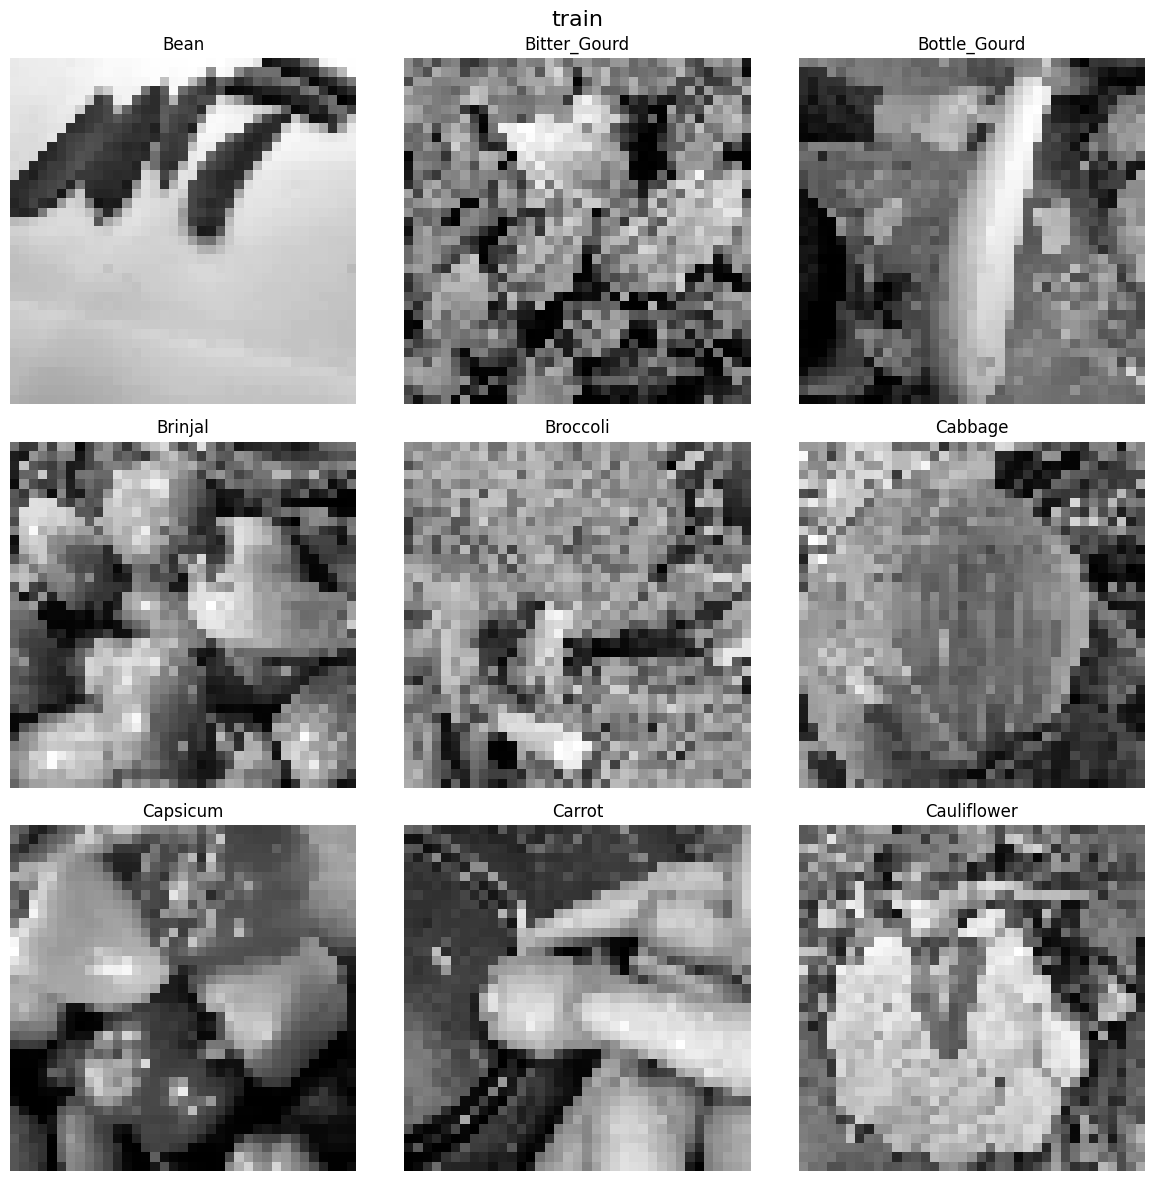

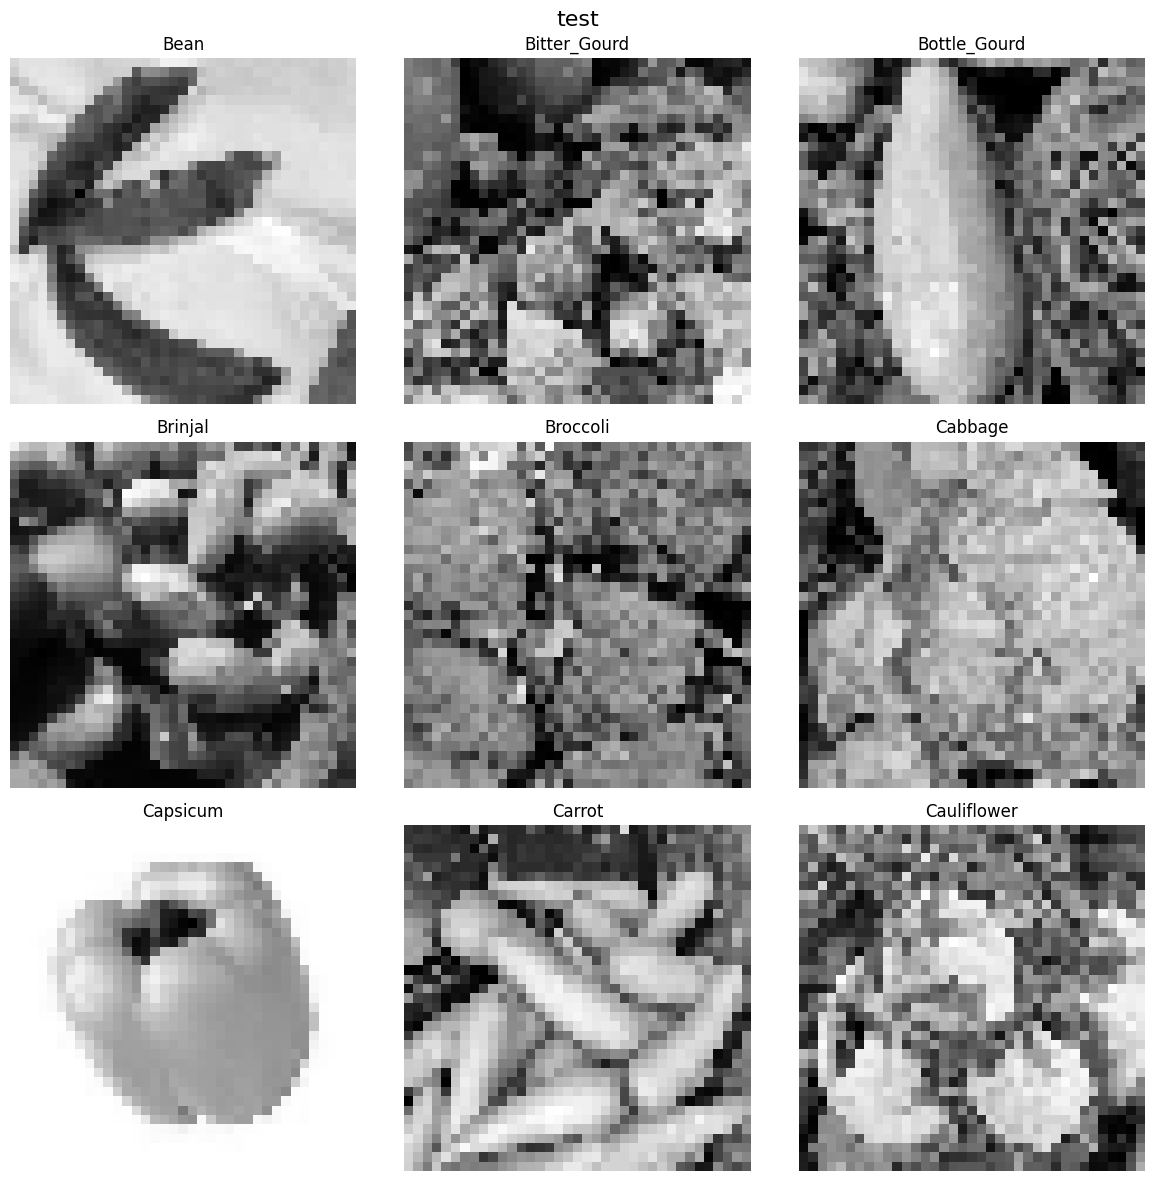

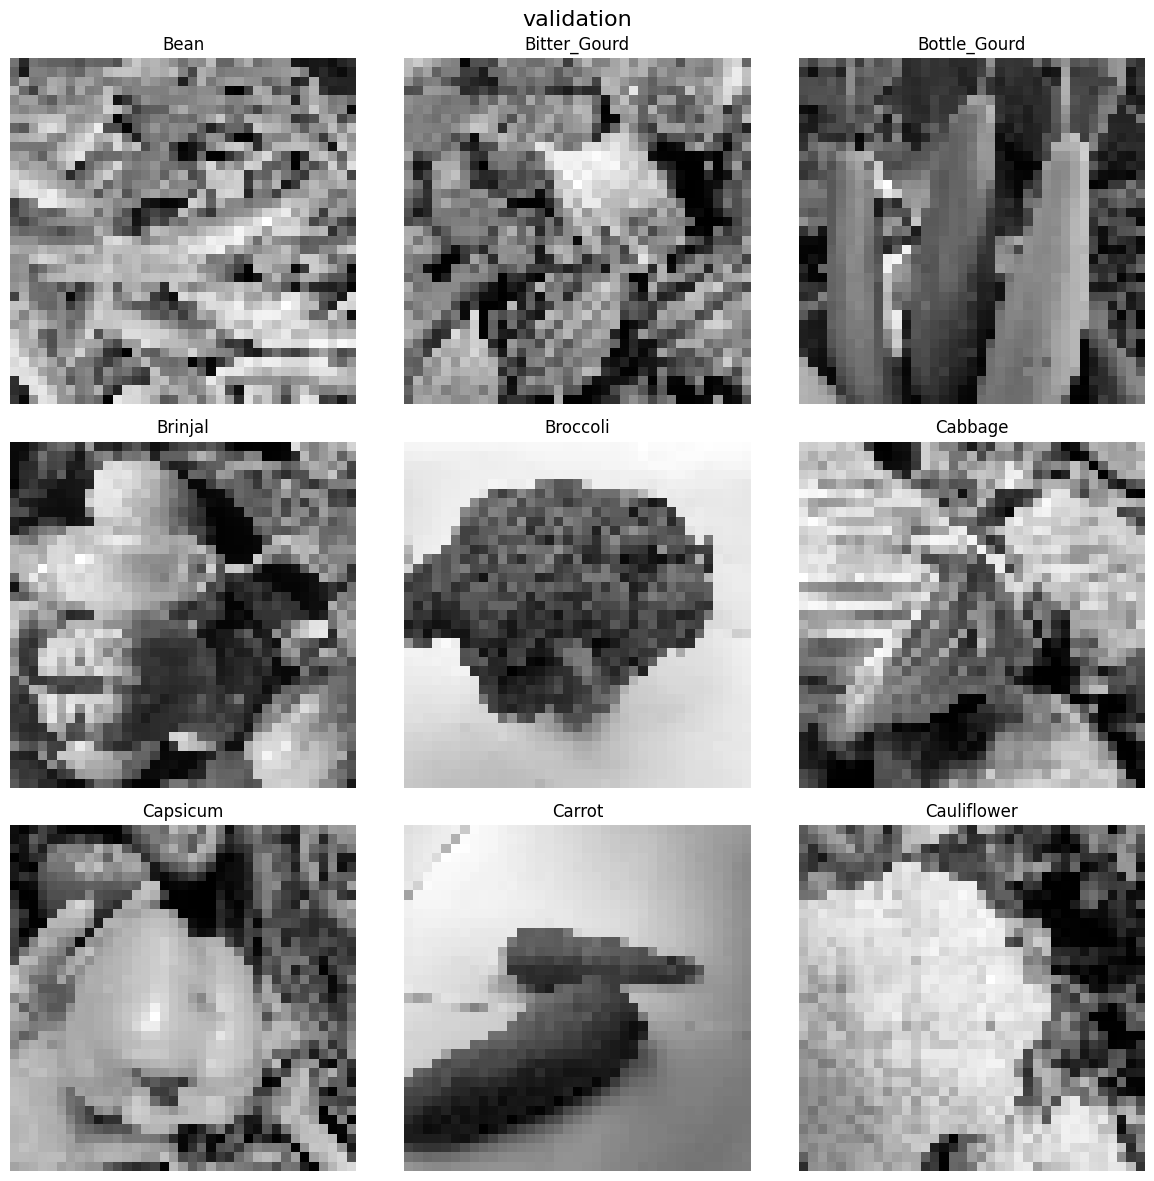

In [5]:

def display_images_by_class(images, labels, plot_title, num_rows=3, num_cols=3):
    unique_labels = np.unique(labels)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
    fig.suptitle(plot_title, fontsize=16)

    for i, ax in enumerate(axes.flat):
        if i < len(unique_labels):
            label = unique_labels[i]
            label_indices = np.where(labels == label)[0]
            if len(label_indices) > 0:
                image_index = label_indices[0]
                ax.imshow(images[image_index], cmap='gray')
                ax.set_title(label)
        ax.axis('off')

    plt.tight_layout()
    plt.show()


display_images_by_class(X_train_37, y_train_37,"train", num_rows=3, num_cols=3)
display_images_by_class(X_test_37, y_test_37,"test", num_rows=3, num_cols=3)
display_images_by_class(X_val_37, y_val_37,"validation", num_rows=3, num_cols=3)





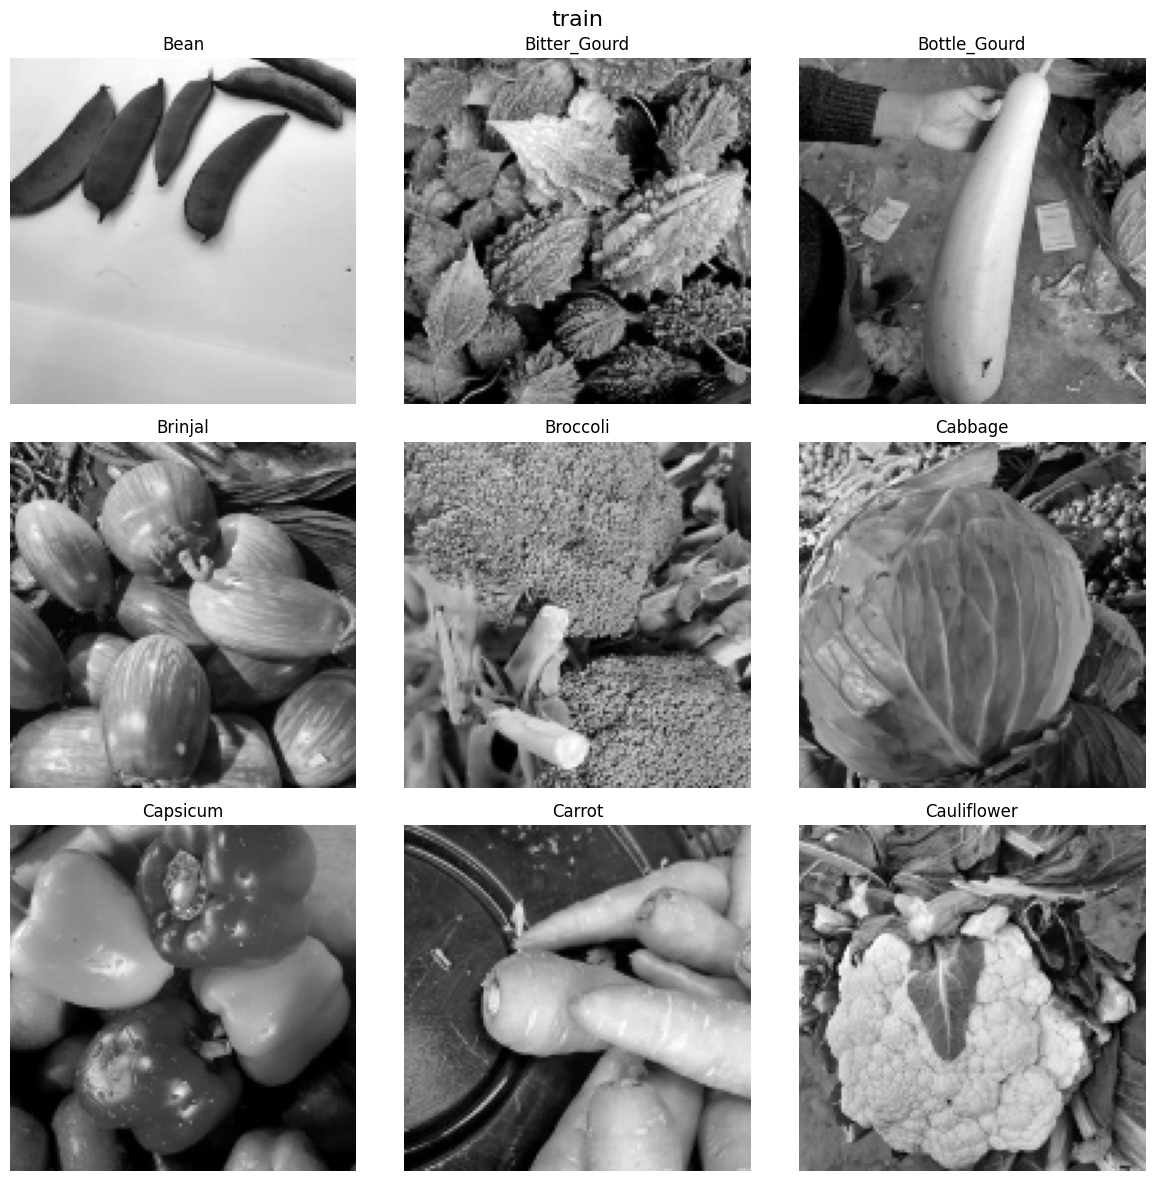

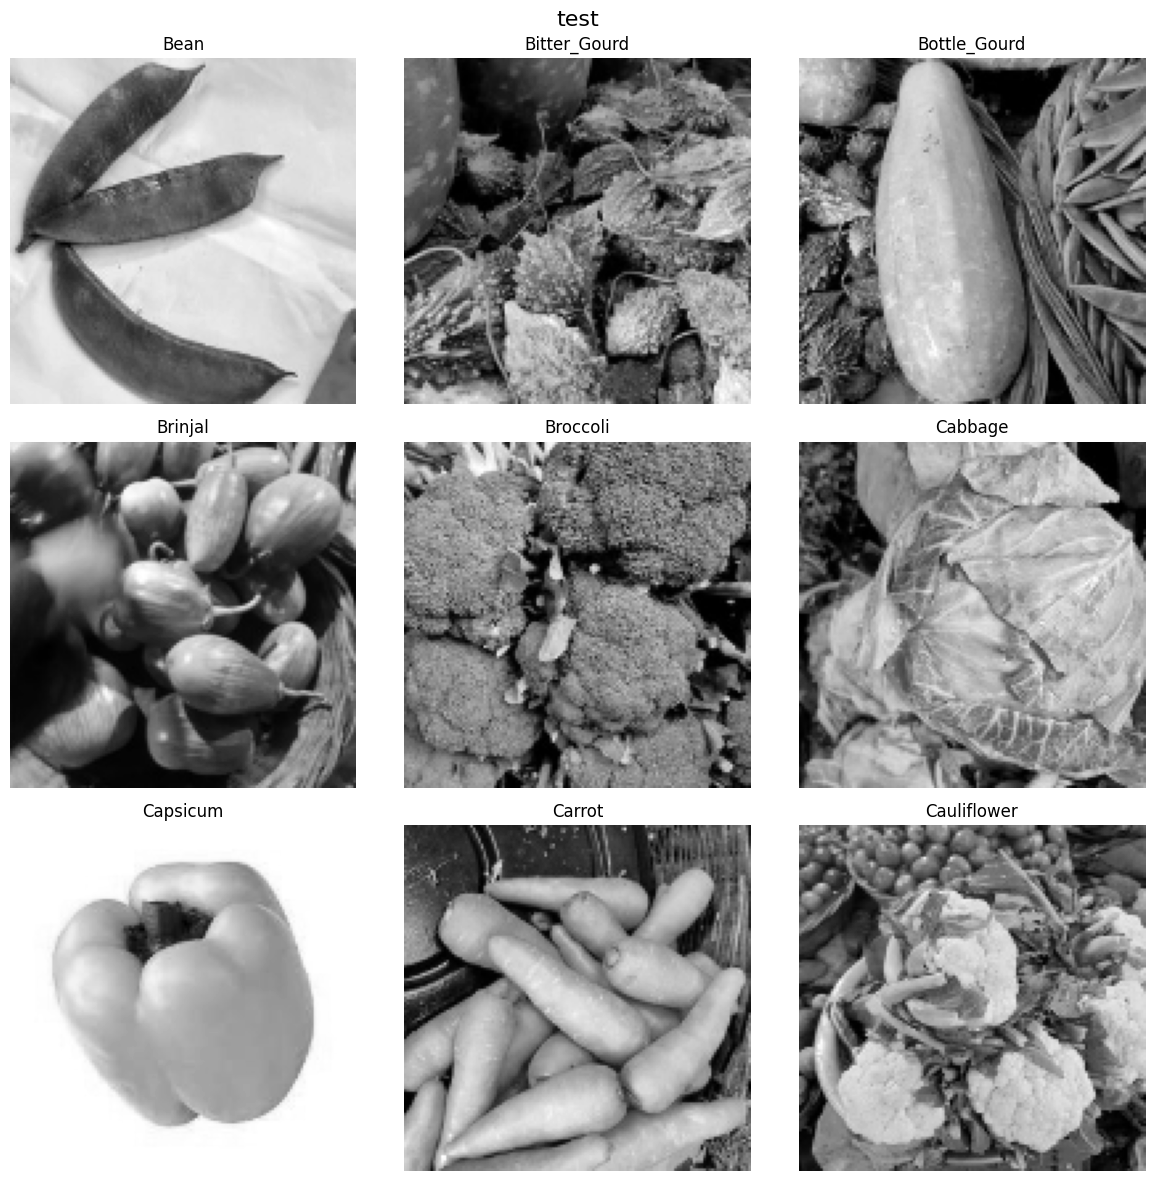

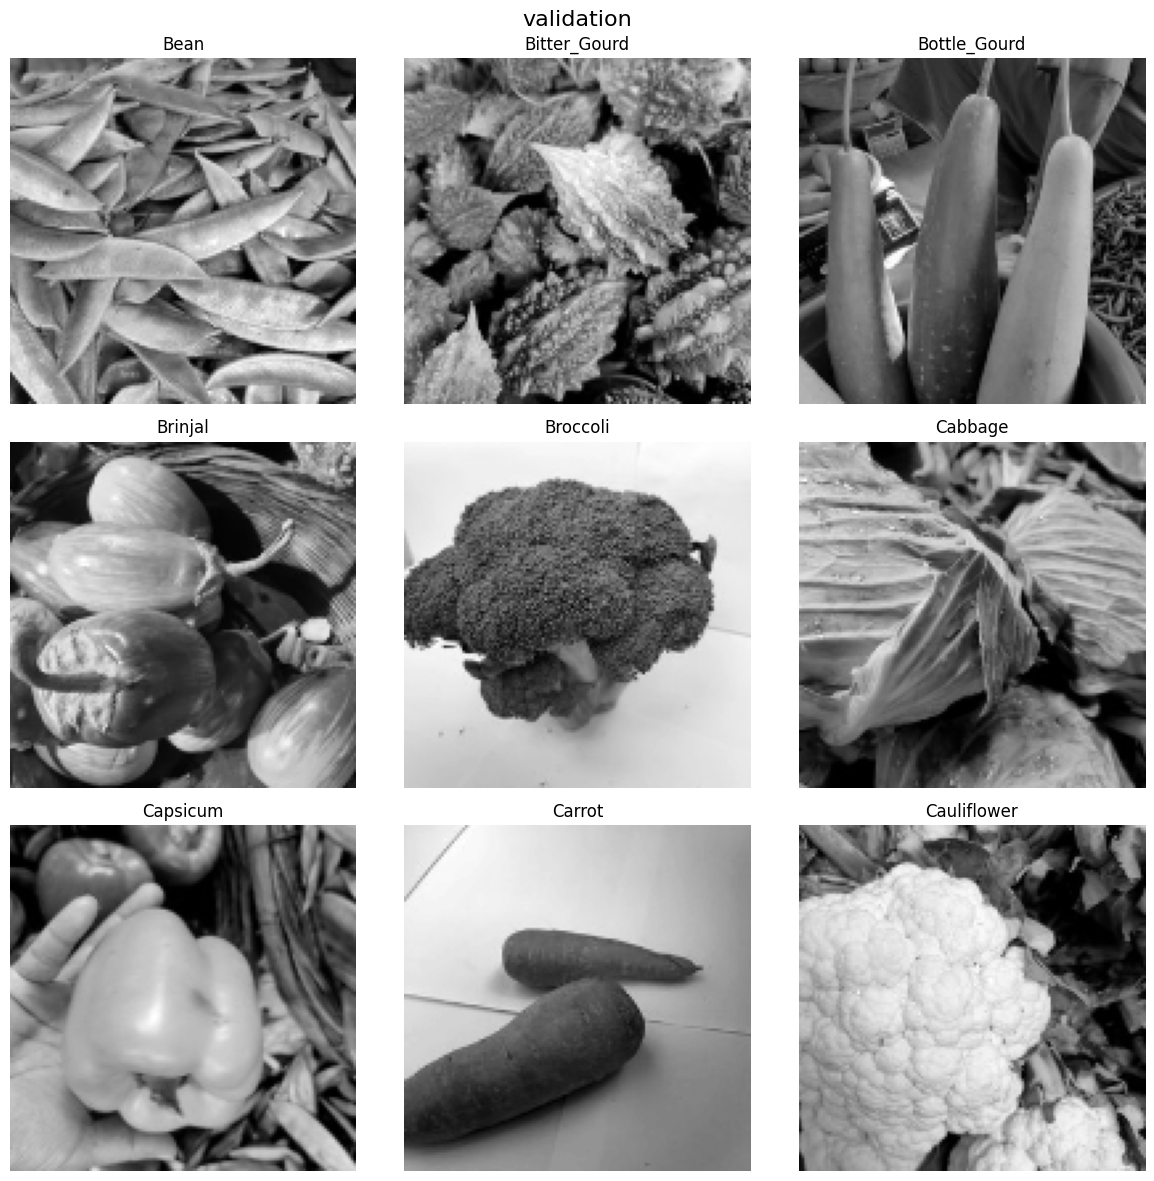

In [6]:
display_images_by_class(X_train_131, y_train_131, "train", num_rows=3, num_cols=3)
display_images_by_class(X_test_131, y_test_131, "test", num_rows=3, num_cols=3)
display_images_by_class(X_val_131, y_val_131, "validation", num_rows=3, num_cols=3)

<h4>here, we can see that the images in the dataset have been converted to greyscale, and have also been resized to 37x37 and 131x131</h4>

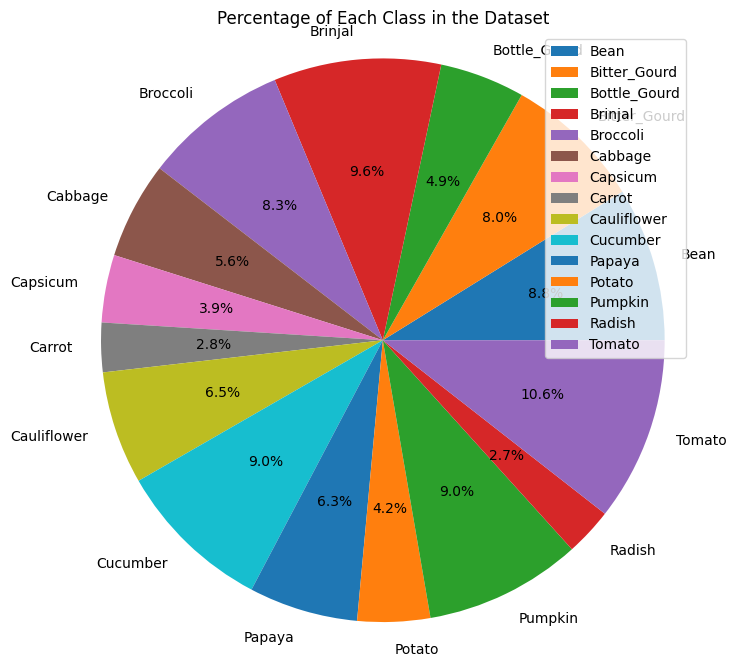

(9048, 37, 37)
(9048,)
(3000, 37, 37)
(3000,)


In [7]:

unique_classes = np.unique(y_train_37)
label_to_index = {label: i for i, label in enumerate(unique_classes)}
y_train_numeric = np.array([label_to_index[label] for label in y_train_37])

class_counts = np.bincount(y_train_numeric)
class_percentages = (class_counts / len(y_train_numeric)) * 100

plt.figure(figsize=(8, 8))
plt.pie(class_percentages, labels=unique_classes, autopct='%1.1f%%')
plt.title('Percentage of Each Class in the Dataset')
plt.axis('equal')
plt.legend()
plt.show()

print(X_train_37.shape)
print(y_train_37.shape)
print(X_val_37.shape)
print(y_val_37.shape)

here, we can see that the distribution of different veggie types is not equal, maybe we cout augment the images later on to make the dataset more balanced

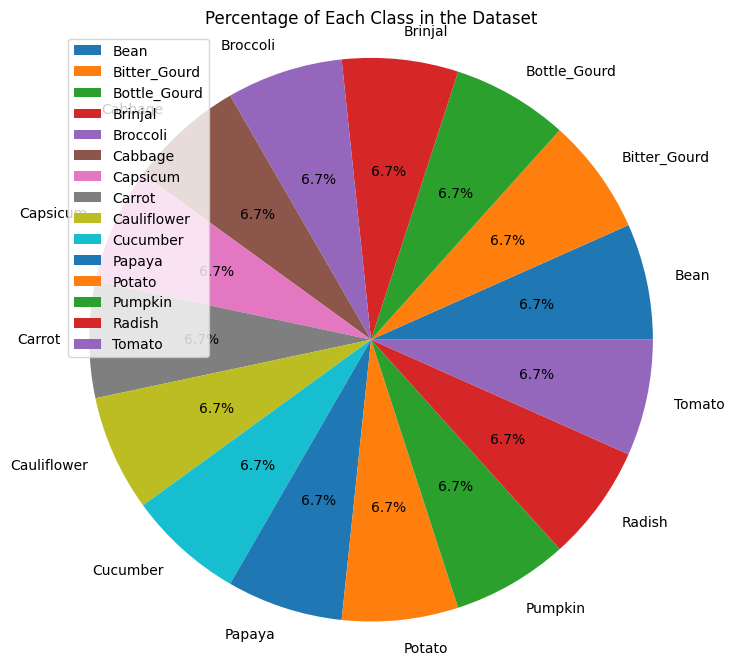

In [8]:

unique_classes = np.unique(y_val_37)
label_to_index = {label: i for i, label in enumerate(unique_classes)}
y_val_numeric = np.array([label_to_index[label] for label in y_val_37])

class_counts = np.bincount(y_val_numeric)
class_percentages = (class_counts / len(y_val_numeric)) * 100

plt.figure(figsize=(8, 8))
plt.pie(class_percentages, labels=unique_classes, autopct='%1.1f%%')
plt.title('Percentage of Each Class in the Dataset')
plt.axis('equal')
plt.legend()
plt.show()


for the validation set its equal so that is good.

In [9]:
print(X_val_37.shape[0])



3000


In [68]:
print(X_train_37.shape)
print(y_train_37.shape)
print(X_val_37.shape)
print(y_val_37.shape)



(28650, 37, 37, 1)
(3438000, 2)
(6000, 37, 37, 1)
(720000, 2)


In [69]:
print(X_train_131.shape)
print(y_train_131.shape)
print(X_val_131.shape)
print(y_val_131.shape)


(9028, 131, 131)
(9028, 15)
(3000, 131, 131)
(3000, 15)


In [4]:



# implement early stopping
earlyStopping = EarlyStopping(monitor="val_loss", patience=5)
# fix random seed for reproducibility



tf.keras.utils.set_random_seed(42)
def preprocess_data(X_train, y_train, X_val, y_val):

    # one hot encode outputs
    num_classes = len(np.unique(np.concatenate((y_train, y_val))))
    y_train = y_train.reshape(-1)
    y_val = y_val.reshape(-1)

    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_val = label_encoder.transform(y_val)

    y_train = to_categorical(y_train, num_classes)
    y_val = to_categorical(y_val, num_classes)
    num_classes = y_val.shape[1]

    return X_train, y_train, X_val, y_val, num_classes

def preprocess_data_final(X_train, y_train,X_val,y_val, X_test, y_test):

    # one hot encode outputs
    num_classes = len(np.unique(np.concatenate((y_train, y_test))))
    y_train = y_train.reshape(-1)
    y_val = y_val.reshape(-1)
    y_test = y_test.reshape(-1)

    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_val = label_encoder.transform(y_val)
    y_test = label_encoder.transform(y_test)



    y_train = to_categorical(y_train, num_classes)
    y_val = to_categorical(y_val, num_classes)
    y_test = to_categorical(y_test, num_classes)
    num_classes = y_test.shape[1]

    X_train = np.concatenate((X_train, X_val), axis=0)
    y_train = np.concatenate((y_train, y_val), axis=0)

    return X_train, y_train, X_test, y_test, num_classes

# # Preprocess X_train_37, y_train_37, X_val_37, y_val_37
X_train_37, y_train_37, X_val_37, y_val_37, num_classes_37 = preprocess_data(X_train_37, y_train_37, X_val_37, y_val_37)

X_train_131, y_train_131, X_val_131, y_val_131, num_classes_131 = preprocess_data(X_train_131, y_train_131, X_val_131, y_val_131)



num_classes = y_val_37.shape[1]
input_shape_37 = (37,37,1)
input_shape_131 = (131,131,1)

# build the model





def create_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model



def plot_accuracy_loss(history):
    # Plot the accuracy
    plt.figure(figsize=(8, 6))
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot the loss
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()


In [13]:
X_train_backup_37 = X_train_37
y_train_backup_37 = y_train_37
X_val_backup_37 = X_val_37
y_val_backup_37 = y_val_37

# X_train_37 = X_train_backup_37
# y_train_37 = y_train_backup_37
# X_val_37 = X_val_backup_37
# y_val_37 = y_val_backup_37

X_train_backup_131 = X_train_131
y_train_backup_131 = y_train_131
X_val_backup_131 = X_val_131
y_val_backup_131 = y_val_131

# X_train_131 = X_train_backup_131
# y_train_131 = y_train_backup_131
# X_val_131 = X_val_backup_131
# y_val_131 = y_val_backup_131

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.1124 - loss: 5.3548 - val_accuracy: 0.1730 - val_loss: 2.4920
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2878 - loss: 2.1817 - val_accuracy: 0.3097 - val_loss: 2.1527
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3882 - loss: 1.8904 - val_accuracy: 0.3670 - val_loss: 1.9312
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4619 - loss: 1.6594 - val_accuracy: 0.4433 - val_loss: 1.7098
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5372 - loss: 1.4296 - val_accuracy: 0.4733 - val_loss: 1.6265
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5741 - loss: 1.2942 - val_accuracy: 0.4707 - val_loss: 1.6479
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6163 - loss: 1.1768 - val_accuracy: 0.4987 - val_loss: 1.5610
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6663 - loss: 1.0267 - val_accuracy: 0.4960 - val_l

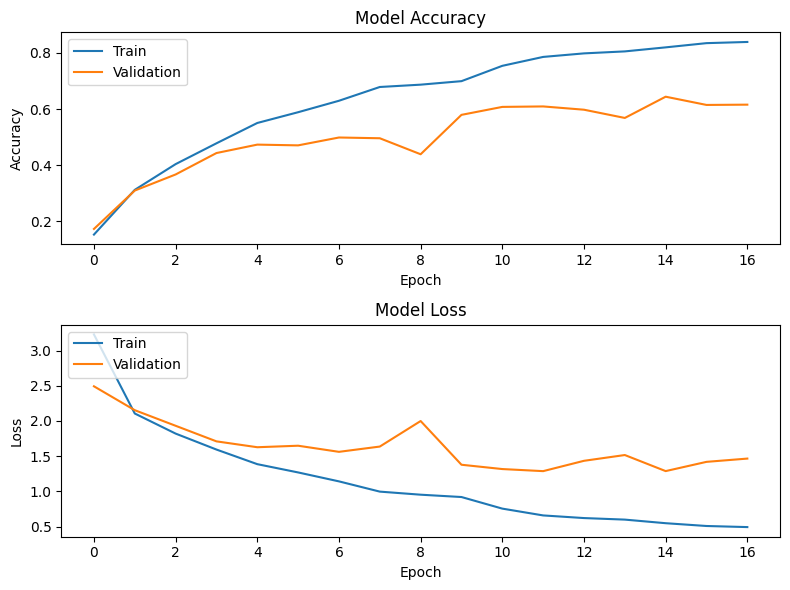

In [14]:
tf.keras.utils.set_random_seed(42)
model=create_cnn_model(input_shape_37,num_classes)

# Fit the model
history = model.fit(X_train_37, y_train_37, validation_data=(X_val_37, y_val_37),
 epochs=100, batch_size=100, verbose=1,callbacks=[earlyStopping])
# Final evaluation of the model
scores = model.evaluate(X_val_37, y_val_37, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

plot_accuracy_loss(history)

Epoch 1/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 32s 339ms/step - accuracy: 0.1825 - loss: 11.2459 - val_accuracy: 0.4160 - val_loss: 1.9205
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 30s 331ms/step - accuracy: 0.5019 - loss: 1.6172 - val_accuracy: 0.4933 - val_loss: 1.8224
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 30s 335ms/step - accuracy: 0.6662 - loss: 1.0754 - val_accuracy: 0.5660 - val_loss: 1.6766
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 30s 330ms/step - accuracy: 0.7793 - loss: 0.7139 - val_accuracy: 0.5907 - val_loss: 1.7668
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 30s 332ms/step - accuracy: 0.8489 - loss: 0.4977 - val_accuracy: 0.6043 - val_loss: 2.0982
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 30s 331ms/step - accuracy: 0.8693 - loss: 0.4315 - val_accuracy: 0.5823 - val_loss: 2.5216
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 30s 332ms/step - accuracy: 0.8749 - loss: 0.4086 - val_accuracy: 0.6423 - val_loss: 2.0397
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 30s 333ms/step - accuracy: 0.9132 - loss: 0.2898 -

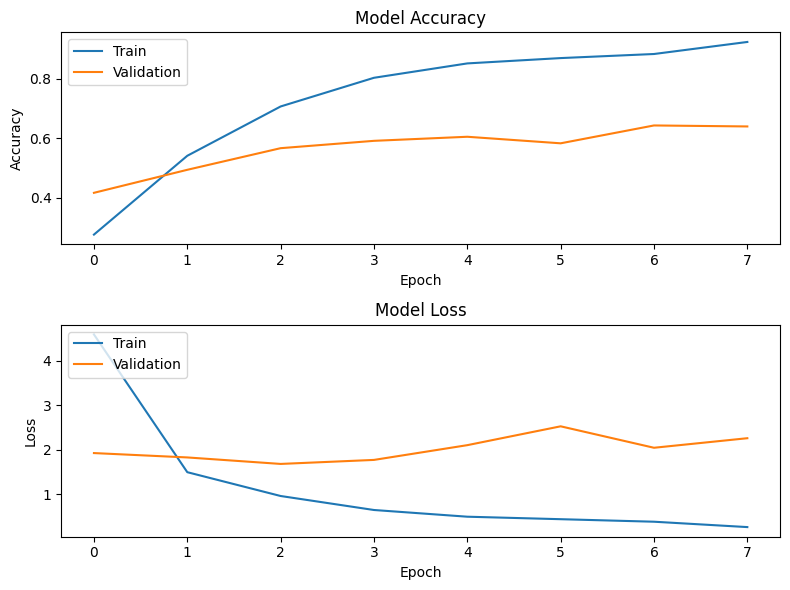

In [15]:
# implement early stopping
earlyStopping = EarlyStopping(monitor="val_loss", patience=5)
tf.keras.utils.set_random_seed(42)
model = create_cnn_model(input_shape_131, num_classes)

# Fit the model
history = model.fit(X_train_131, y_train_131, validation_data=(X_val_131, y_val_131),
                    epochs=100, batch_size=100, verbose=1, callbacks=[earlyStopping])
# Final evaluation of the model
scores = model.evaluate(X_val_131, y_val_131, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

plot_accuracy_loss(history)



results:
<br>
pre anomaly removal (37x37)= val_accuracy: 0.6157 - val_loss: 1.4651
<br>
pre anomaly removal (131x131)= val_accuracy: 0.6390 - val_loss: 2.2543

first step, i will be removing anomalous data from the dataset. from reviewing the data, i have found data that are in the wrong folders, such as immages of carrots in the bean dataset, and also copies of the same image in the bean dataset. i have removed the anomalies and put them in a seperate folder, named rejected. now i will load it as the X and y.


In [6]:
X_train_37,y_train_37=load_images_from_folder_37("/content/drive/MyDrive/Dataset for CA1 part A - cleaned/train")
X_test_37,y_test_37=load_images_from_folder_37("/content/drive/MyDrive/Dataset for CA1 part A - cleaned/test")
X_val_37,y_val_37=load_images_from_folder_37("/content/drive/MyDrive/Dataset for CA1 part A - cleaned/validation")




In [5]:
X_train_131, y_train_131 = load_images_from_folder_131("/content/drive/MyDrive/Dataset for CA1 part A - cleaned/train")
X_test_131, y_test_131 = load_images_from_folder_131("/content/drive/MyDrive/Dataset for CA1 part A - cleaned/test")
X_val_131, y_val_131 = load_images_from_folder_131("/content/drive/MyDrive/Dataset for CA1 part A - cleaned/validation")


In [7]:
X_train_backup_37 = X_train_37
y_train_backup_37 = y_train_37
X_val_backup_37 = X_val_37
y_val_backup_37 = y_val_37
X_test_backup_37 = X_test_37
y_test_backup_37 = y_test_37

# X_train_37 = X_train_backup_37
# y_train_37 = y_train_backup_37
# X_val_37 = X_val_backup_37
# y_val_37 = y_val_backup_37
# X_test_37 = X_test_backup_37
# y_test_37 = y_test_backup_37




In [8]:
X_train_backup_131 = X_train_131
y_train_backup_131 = y_train_131
X_val_backup_131 = X_val_131
y_val_backup_131 = y_val_131
X_test_backup_131 = X_test_131
y_test_backup_131 = y_test_131

# X_train_131 = X_train_backup_131
# y_train_131 = y_train_backup_131
# X_val_131 = X_val_backup_131
# y_val_131 = y_val_backup_131
# X_test_131 = X_test_backup_131
# y_test_131 = y_test_backup_131


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.1155 - loss: 3.8658 - val_accuracy: 0.2153 - val_loss: 2.3948
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3043 - loss: 2.1299 - val_accuracy: 0.3393 - val_loss: 2.1135
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4196 - loss: 1.7871 - val_accuracy: 0.3967 - val_loss: 1.9148
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5164 - loss: 1.4921 - val_accuracy: 0.4967 - val_loss: 1.5445
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5915 - loss: 1.2523 - val_accuracy: 0.5577 - val_loss: 1.3993
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6586 - loss: 1.0579 - val_accuracy: 0.5800 - val_loss: 1.3313
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6995 - loss: 0.9395 - val_accuracy: 0.6133 - val_loss: 1.3011
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7315 - loss: 0.8158 - val_accuracy: 0.6273 - val_l

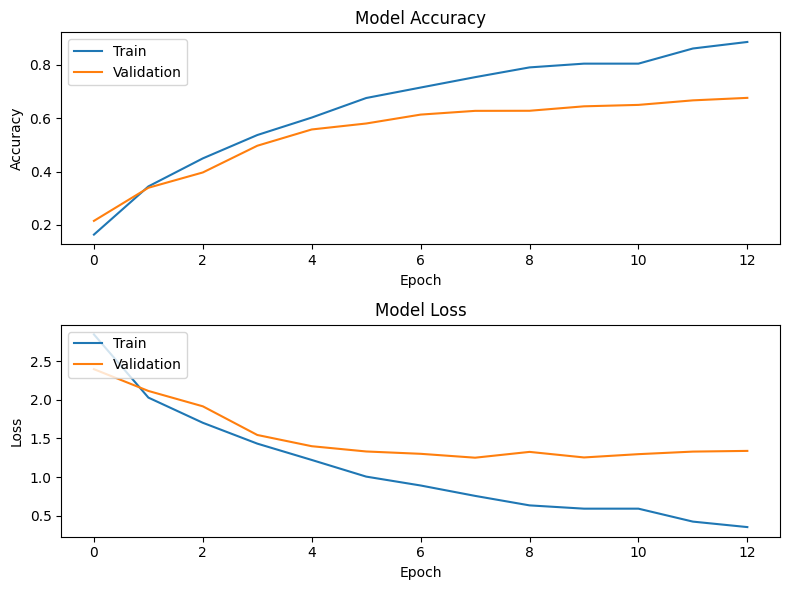

In [149]:

# fix random seed for reproducibility

tf.keras.utils.set_random_seed(42)
X_train_37, y_train_37, X_val_37, y_val_37, num_classes = preprocess_data(X_train_37, y_train_37, X_val_37, y_val_37)



model = create_cnn_model(input_shape_37, num_classes)
# Fit the model
history = model.fit(X_train_37, y_train_37, validation_data=(X_val_37, y_val_37),
                    epochs=100, batch_size=100, verbose=1, callbacks=[earlyStopping])
# Final evaluation of the model
scores = model.evaluate(X_val_37, y_val_37, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

plot_accuracy_loss(history)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 35s 362ms/step - accuracy: 0.1559 - loss: 12.4709 - val_accuracy: 0.3633 - val_loss: 2.0270
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 32s 354ms/step - accuracy: 0.4791 - loss: 1.6804 - val_accuracy: 0.5787 - val_loss: 1.4449
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 32s 355ms/step - accuracy: 0.6765 - loss: 1.0482 - val_accuracy: 0.6397 - val_loss: 1.2622
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 32s 354ms/step - accuracy: 0.8018 - loss: 0.6439 - val_accuracy: 0.5643 - val_loss: 1.8234
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 32s 356ms/step - accuracy: 0.8576 - loss: 0.4611 - val_accuracy: 0.6677 - val_loss: 1.5861
CNN Error: 33.23%


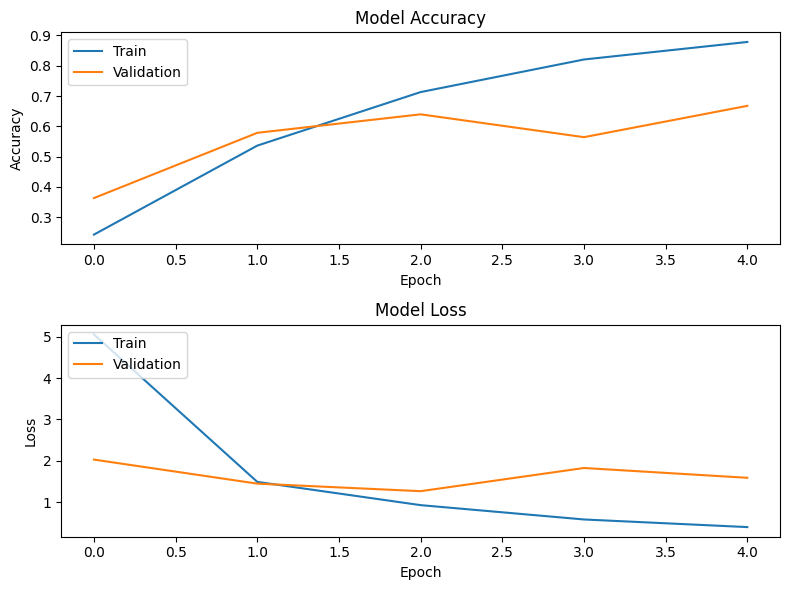

In [150]:


tf.keras.utils.set_random_seed(42)
X_train_131, y_train_131, X_val_131, y_val_131, num_classes = preprocess_data(X_train_131, y_train_131, X_val_131, y_val_131)

model = create_cnn_model(input_shape_131, num_classes)
# Fit the model
history = model.fit(X_train_131, y_train_131, validation_data=(X_val_131, y_val_131),
                    epochs=100, batch_size=100, verbose=1, callbacks=[earlyStopping])
# Final evaluation of the model
scores = model.evaluate(X_val_131, y_val_131, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

plot_accuracy_loss(history)


results:
<br>
pre anomaly removal (37x37)= val_accuracy: 0.6157 - val_loss: 1.4651
<br>
pre anomaly removal (131x131)= val_accuracy: 0.6390 - val_loss: 2.2543
<br>
<br>


post anomaly removal(37x37)= val_accuracy: 0.6760 - val_loss: 1.3388
<br>
post anomaly removal (131x131)=val_accuracy: 0.6677 - val_loss: 1.5861


In [156]:
X_train_37 = X_train_backup_37
y_train_37 = y_train_backup_37
X_val_37 = X_val_backup_37
y_val_37 = y_val_backup_37


X_train_131 = X_train_backup_131
y_train_131 = y_train_backup_131
X_val_131 = X_val_backup_131
y_val_131 = y_val_backup_131


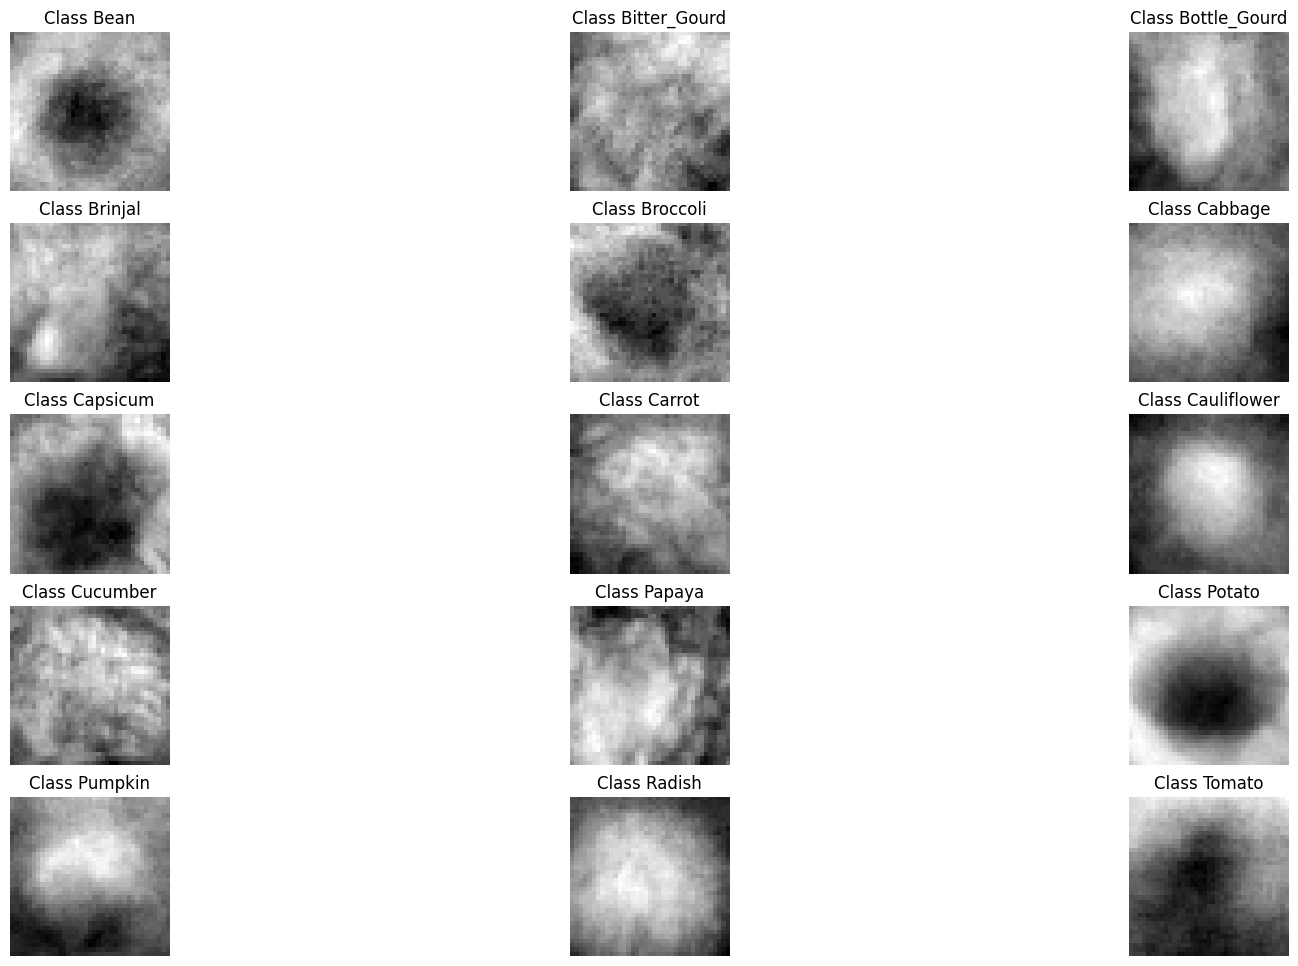

In [153]:

unique_labels = np.unique(y_train_37)


fig_size = (20, 12)
rows, cols = 5, 3

fig, axs = plt.subplots(rows, cols, figsize=fig_size)
axs = axs.ravel()


for i, label in enumerate(unique_labels):

    class_mask = y_train_37 == label
    class_images = X_train_37[class_mask]


    mean_pixels = np.mean(class_images, axis=0)


    img_rows, img_cols = X_train_37.shape[1], X_train_37.shape[2]
    mean_image = mean_pixels.reshape(img_rows, img_cols)


    ax = axs[i]
    ax.imshow(mean_image, cmap='gray')
    ax.set_title(f'Class {label}')
    ax.axis('off')


plt.subplots_adjust(wspace=0.3, hspace=0.2)

plt.show()





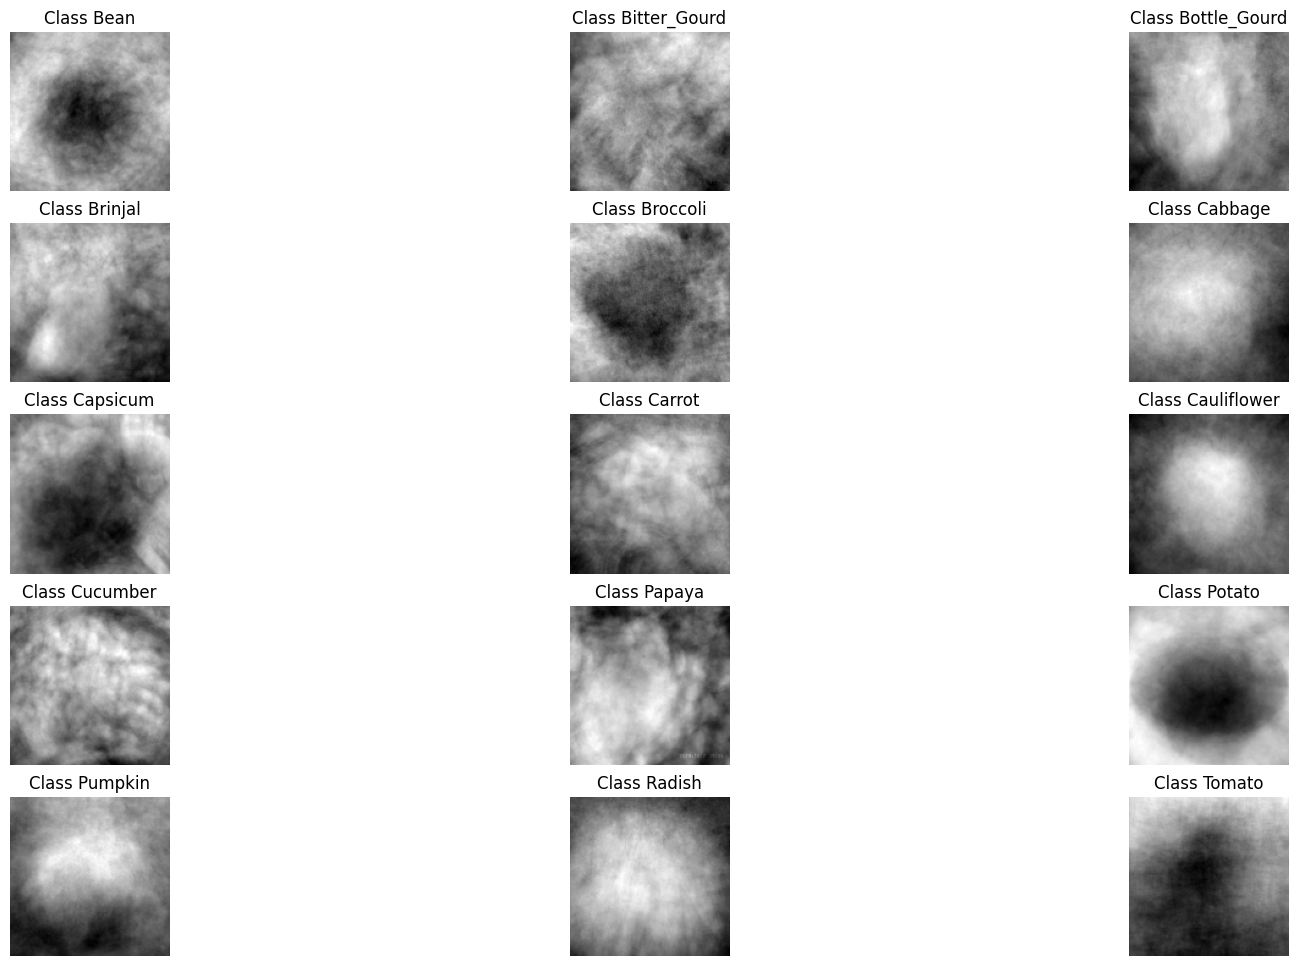

In [154]:

unique_labels = np.unique(y_train_131)

# Set figure size and number of rows and columns
fig_size = (20, 12)
rows, cols = 5, 3
# Create a figure with subplots
fig, axs = plt.subplots(rows, cols, figsize=fig_size)
axs = axs.ravel()  # Flatten the axs array

# Iterate over unique labels and display mean images
for i, label in enumerate(unique_labels):
    # Filter images belonging to the current class
    class_mask = y_train_131 == label
    class_images = X_train_131[class_mask]

    # Calculate mean pixel values for the class
    mean_pixels = np.mean(class_images, axis=0)

    # Reshape mean pixels to original image shape
    img_rows, img_cols = X_train_131.shape[1], X_train_131.shape[2]
    mean_image = mean_pixels.reshape(img_rows, img_cols)

    # Display the mean image for the class
    ax = axs[i]
    ax.imshow(mean_image, cmap='gray')
    ax.set_title(f'Class {label}')
    ax.axis('off')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.2)  # Reduce vertical spacing (hspace)

plt.show()


Here we can see that the average image of each class

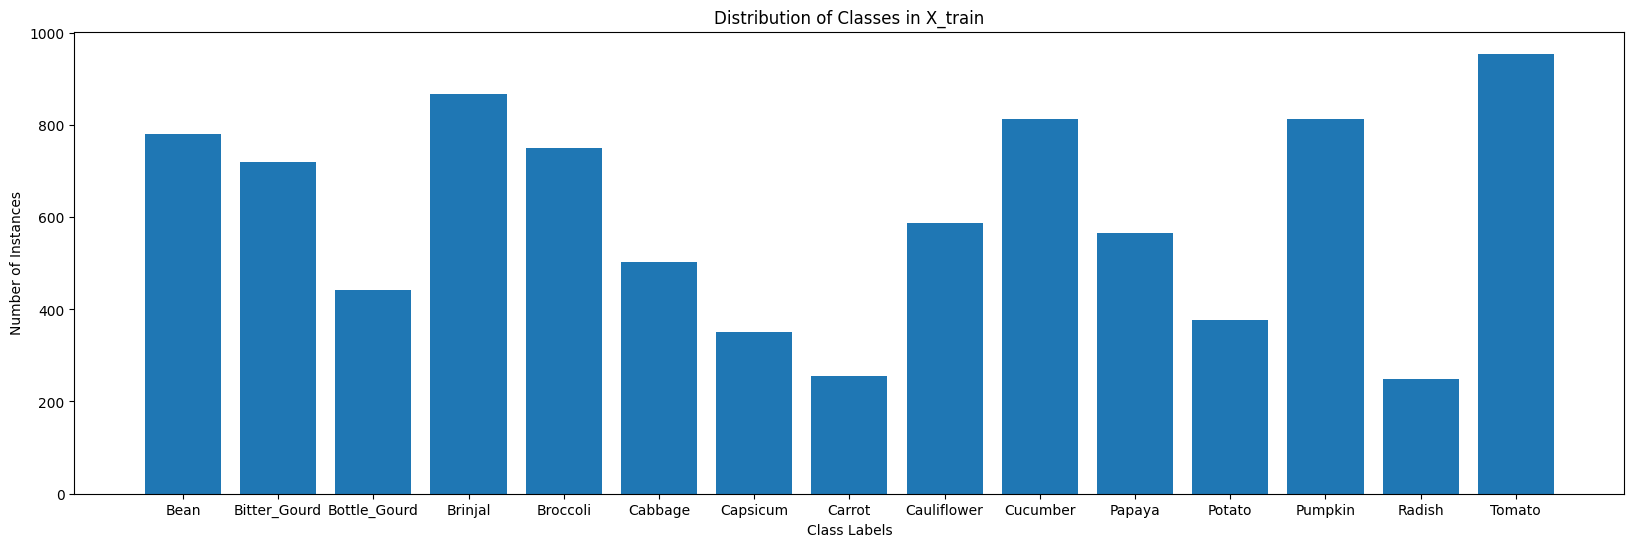

In [155]:


# Assuming you have X_train and y_train loaded

# Count instances of each class
unique_labels, counts = np.unique(y_train_37, return_counts=True)

# Set figure size
plt.figure(figsize=(20, 6))

# Create bar chart
plt.bar(unique_labels, counts)

# Add labels and title
plt.xlabel('Class Labels')
plt.ylabel('Number of Instances')
plt.title('Distribution of Classes in X_train')

# Show plot
plt.show()



to address the issue of the dataset having an uneven number of values for each class, i will be performing argumentation to make the number the same.

<h1>Undersampling</h1>
undersampling makes all classes the same size as the smallest class, this could potentially hhelp improve accuracy and reduce loss by balancing the class distribution

In [157]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

def undersample_data(X_train, y_train):

    y_train_flat = [label for row in y_train for label in row]

    class_counts = Counter(y_train_flat)


    minority_class_size = min(class_counts.values())


    undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

    X_train_2d = X_train.reshape(X_train.shape[0], -1)

    X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train_2d, y_train)

    X_train_undersampled_3d = X_train_undersampled.reshape(X_train_undersampled.shape[0], *X_train.shape[1:])

    return X_train_undersampled_3d, y_train_undersampled


In [158]:
X_train_37, y_train_37 = undersample_data(X_train_37, y_train_37)
X_train_131, y_train_131 = undersample_data(X_train_131, y_train_131)


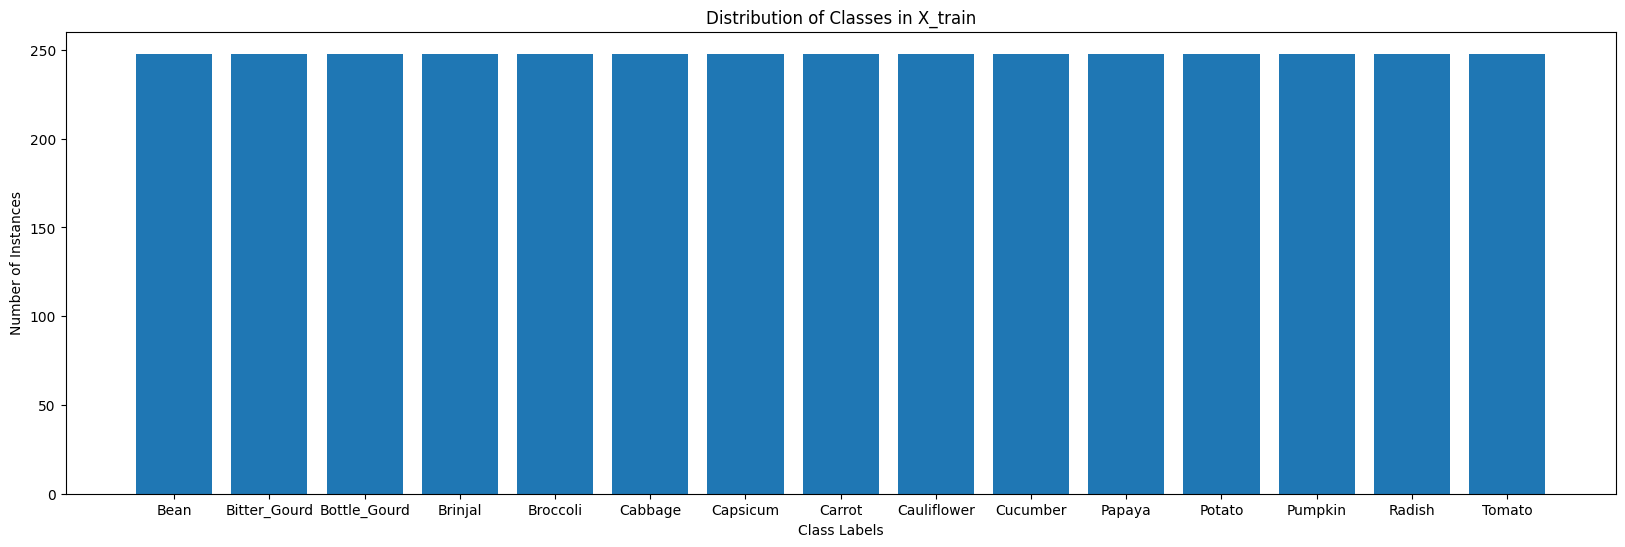

In [159]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have X_train and y_train loaded

# Count instances of each class
unique_labels, counts = np.unique(y_train_37, return_counts=True)

# Set figure size
plt.figure(figsize=(20, 6))

# Create bar chart
plt.bar(unique_labels, counts)

# Add labels and title
plt.xlabel('Class Labels')
plt.ylabel('Number of Instances')
plt.title('Distribution of Classes in X_train')

# Show plot
plt.show()


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.0679 - loss: 4.9093 - val_accuracy: 0.1247 - val_loss: 2.6317
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.1359 - loss: 2.5914 - val_accuracy: 0.1780 - val_loss: 2.4682
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2551 - loss: 2.3028 - val_accuracy: 0.2677 - val_loss: 2.2621
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3301 - loss: 2.0348 - val_accuracy: 0.3263 - val_loss: 2.0611
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4369 - loss: 1.7629 - val_accuracy: 0.3433 - val_loss: 2.0388
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4999 - loss: 1.5578 - val_accuracy: 0.4080 - val_loss: 1.8541
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5764 - loss: 1.3399 - val_accuracy: 0.4323 - val_loss: 1.8639
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6113 - loss: 1.1831 - val_accuracy: 0.5100 - val_l

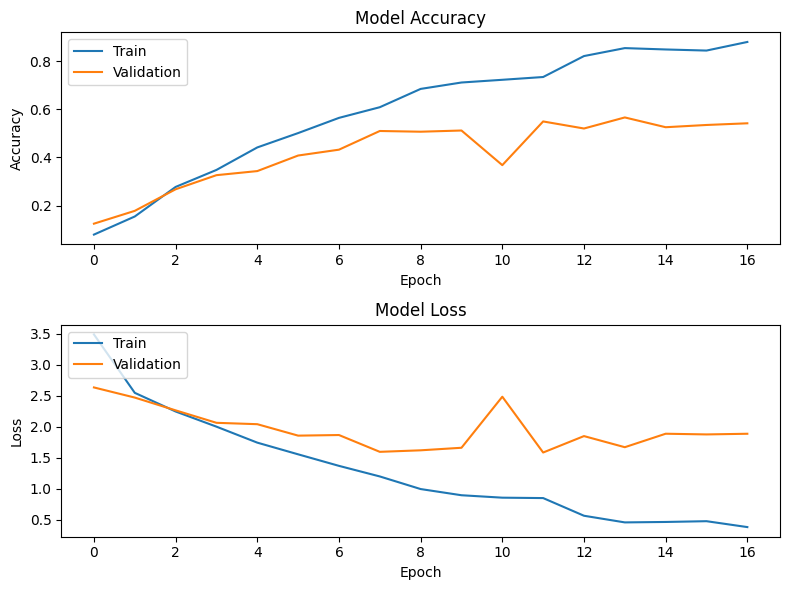

In [160]:
# fix random seed for reproducibility
earlyStopping = EarlyStopping(monitor="val_loss", patience=5)

tf.keras.utils.set_random_seed(42)
X_train_37, y_train_37, X_val_37, y_val_37, num_classes = preprocess_data(X_train_37, y_train_37, X_val_37, y_val_37)



model = create_cnn_model(input_shape_37, num_classes)
# Fit the model
history = model.fit(X_train_37, y_train_37, validation_data=(X_val_37, y_val_37),
                    epochs=100, batch_size=100, verbose=1, callbacks=[earlyStopping])
# Final evaluation of the model
scores = model.evaluate(X_val_37, y_val_37, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

plot_accuracy_loss(history)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 403ms/step - accuracy: 0.0957 - loss: 24.5407 - val_accuracy: 0.2800 - val_loss: 2.3147
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 399ms/step - accuracy: 0.3556 - loss: 2.1146 - val_accuracy: 0.3827 - val_loss: 2.1285
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 404ms/step - accuracy: 0.5327 - loss: 1.5305 - val_accuracy: 0.4717 - val_loss: 1.9831
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 403ms/step - accuracy: 0.6790 - loss: 1.0115 - val_accuracy: 0.5073 - val_loss: 2.1211
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 403ms/step - accuracy: 0.7944 - loss: 0.6670 - val_accuracy: 0.4780 - val_loss: 2.7832
CNN Error: 52.20%


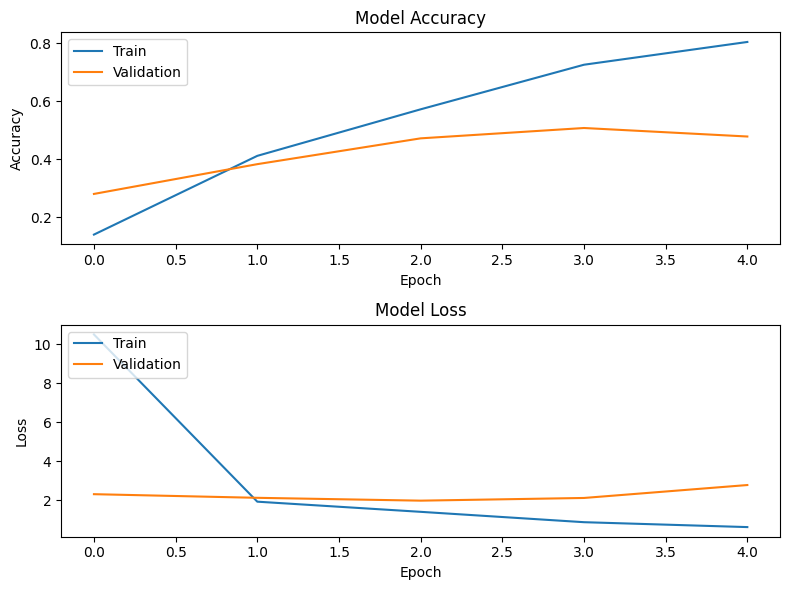

In [161]:
tf.keras.utils.set_random_seed(42)
X_train_131, y_train_131, X_val_131, y_val_131, num_classes_131 = preprocess_data(X_train_131, y_train_131, X_val_131, y_val_131)

model = create_cnn_model(input_shape_131, num_classes)
# Fit the model
history = model.fit(X_train_131, y_train_131, validation_data=(X_val_131, y_val_131),
                    epochs=100, batch_size=100, verbose=1, callbacks=[earlyStopping])
# Final evaluation of the model
scores = model.evaluate(X_val_131, y_val_131, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

plot_accuracy_loss(history)

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html

Holey moley! the accuracy has dropped significantly
<br>
results:
<br>
pre anomaly removal (37x37)= val_accuracy: 0.6157 - val_loss: 1.4651
<br>
pre anomaly removal (131x131)= val_accuracy: 0.6390 - val_loss: 2.2543
<br>
<br>
post anomaly removal(37x37)= val_accuracy: 0.6760 - val_loss: 1.3388
<br>
post anomaly removal (131x131)=val_accuracy: 0.6677 - val_loss: 1.5861
<br>
<br>
post undersampler (37x37)=val_accuracy: 0.5420 - val_loss: 1.8844
<br>
post undersampler (131x131)= val_accuracy: 0.4780 - val_loss: 2.7832

<h1>Oversampling</h1>
since some classes of the dataset are significantly smaller, i will try oversampling to even out the dataset. oversampling consists of artificially duplicating images to make all the classes the same size




In [162]:
X_train_37 = X_train_backup_37
y_train_37 = y_train_backup_37
X_val_37 = X_val_backup_37
y_val_37 = y_val_backup_37


X_train_131 = X_train_backup_131
y_train_131 = y_train_backup_131
X_val_131 = X_val_backup_131
y_val_131 = y_val_backup_131


In [163]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

def oversample_data(X_train, y_train):
    # Convert y_train to a flattened list
    y_train_flat = [label for row in y_train for label in row]

    # Count the number of instances for each class in y_train
    class_counts = Counter(y_train_flat)

    # Find the majority class size
    majority_class_size = max(class_counts.values())

    # Create an instance of RandomOverSampler
    oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

    # Reshape X_train to a 2D array
    X_train_2d = X_train.reshape(X_train.shape[0], -1)

    # Fit and apply the oversampler
    X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_2d, y_train)

    # Reshape X_train_oversampled back to its original 3D shape
    X_train_oversampled_3d = X_train_oversampled.reshape(X_train_oversampled.shape[0], *X_train.shape[1:])

    return X_train_oversampled_3d, y_train_oversampled




https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html

In [164]:
# Apply oversampling to X_train_37, y_train_37
X_train_37_oversampled, y_train_37_oversampled = oversample_data(X_train_37, y_train_37)


X_train_37 = X_train_37_oversampled
y_train_37 = y_train_37_oversampled

In [165]:
# Apply oversampling to X_train_131, y_train_131
X_train_131_oversampled, y_train_131_oversampled = oversample_data(X_train_131, y_train_131)

X_train_131 = X_train_131_oversampled
y_train_131 = y_train_131_oversampled


In [166]:
print(X_train_37.shape)
print(y_train_37.shape)
print(X_val_37.shape)
print(y_val_37.shape)

print(X_train_131.shape)
print(y_train_131.shape)
print(X_val_131.shape)
print(y_val_131.shape)

(14325, 37, 37)
(14325,)
(3000, 37, 37)
(3000,)
(14325, 131, 131)
(14325,)
(3000, 131, 131)
(3000,)


we can see that the dataset has been expandedd significantly, which gives the

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.1213 - loss: 3.3907 - val_accuracy: 0.3237 - val_loss: 2.0591
Epoch 2/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.4198 - loss: 1.7841 - val_accuracy: 0.4257 - val_loss: 1.8223
Epoch 3/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6094 - loss: 1.2245 - val_accuracy: 0.5813 - val_loss: 1.3155
Epoch 4/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7193 - loss: 0.8631 - val_accuracy: 0.6003 - val_loss: 1.3684
Epoch 5/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7956 - loss: 0.6286 - val_accuracy: 0.6353 - val_loss: 1.3281
Epoch 6/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8692 - loss: 0.4156 - val_accuracy: 0.6763 - val_loss: 1.2060
Epoch 7/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8910 - loss: 0.3336 - val_accuracy: 0.6280 - val_loss: 1.5470
Epoch 8/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8984 - loss: 0.3174 - val_accuracy

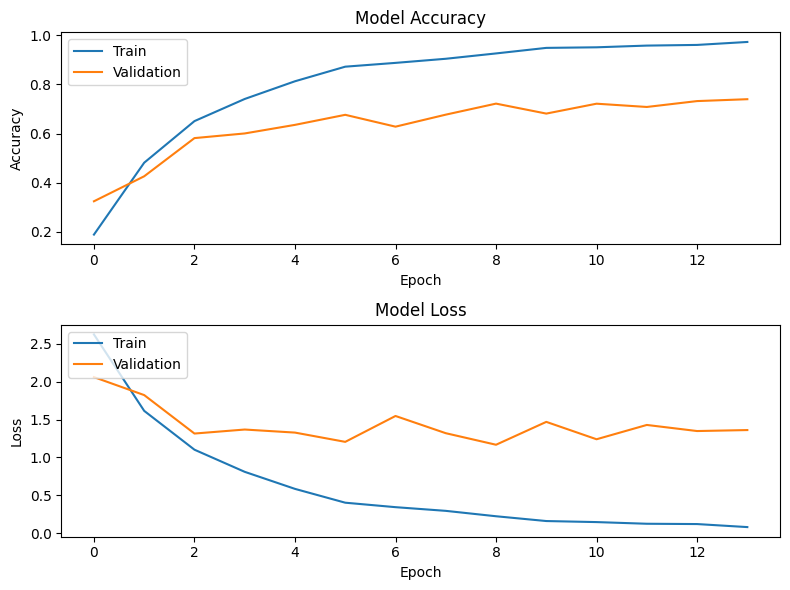

In [167]:

# fix random seed for reproducibility

tf.keras.utils.set_random_seed(42)
X_train_37, y_train_37, X_val_37, y_val_37, num_classes_37 = preprocess_data(X_train_37, y_train_37, X_val_37, y_val_37)



model = create_cnn_model(input_shape_37, num_classes)
# Fit the model
history = model.fit(X_train_37, y_train_37, validation_data=(X_val_37, y_val_37),
                    epochs=100, batch_size=100, verbose=1, callbacks=[earlyStopping])
# Final evaluation of the model
scores = model.evaluate(X_val_37, y_val_37, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

plot_accuracy_loss(history)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 50s 337ms/step - accuracy: 0.2061 - loss: 9.5686 - val_accuracy: 0.5610 - val_loss: 1.4175
Epoch 2/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 49s 338ms/step - accuracy: 0.7160 - loss: 0.9409 - val_accuracy: 0.6737 - val_loss: 1.2009
Epoch 3/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 49s 341ms/step - accuracy: 0.8781 - loss: 0.4105 - val_accuracy: 0.6170 - val_loss: 1.5297
Epoch 4/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 49s 342ms/step - accuracy: 0.9165 - loss: 0.2641 - val_accuracy: 0.6903 - val_loss: 1.7391
Epoch 5/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 49s 343ms/step - accuracy: 0.9546 - loss: 0.1529 - val_accuracy: 0.7013 - val_loss: 1.7370
CNN Error: 29.87%


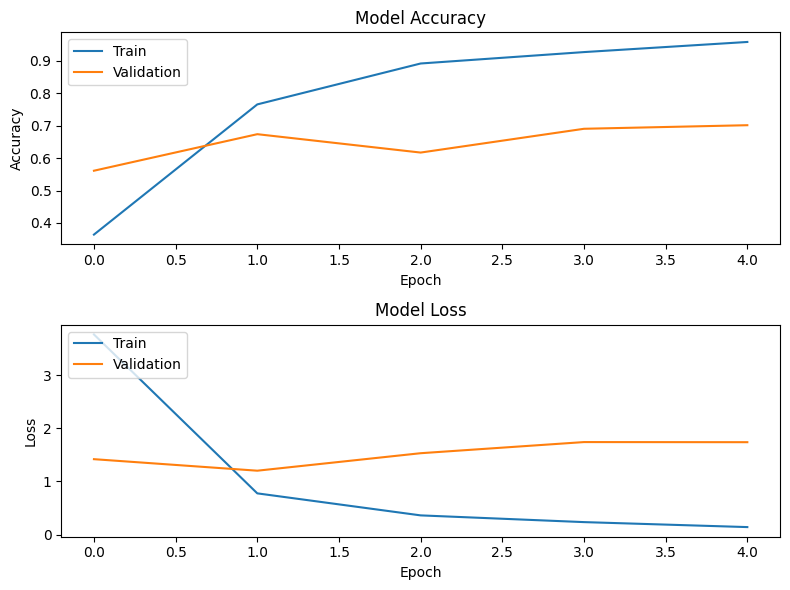

In [168]:

# fix random seed for reproducibility

tf.keras.utils.set_random_seed(42)

X_train_131, y_train_131, X_val_131, y_val_131, num_classes = preprocess_data(X_train_131, y_train_131, X_val_131, y_val_131)

model = create_cnn_model(input_shape_131, num_classes)
# Fit the model
history = model.fit(X_train_131, y_train_131, validation_data=(X_val_131, y_val_131),
                    epochs=100, batch_size=100, verbose=1, callbacks=[earlyStopping])
# Final evaluation of the model
scores = model.evaluate(X_val_131, y_val_131, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

plot_accuracy_loss(history)

results:
<br>
pre anomaly removal (37x37)= val_accuracy: 0.6157 - val_loss: 1.4651
<br>
pre anomaly removal (131x131)= val_accuracy: 0.6390 - val_loss: 2.2543
<br>
<br>
post anomaly removal(37x37)= val_accuracy: 0.6760 - val_loss: 1.3388
<br>
post anomaly removal (131x131)=val_accuracy: 0.6677 - val_loss: 1.5861
<br>
<br>
post undersampler (37x37)=val_accuracy: 0.5420 - val_loss: 1.8844
<br>
post undersampler (131x131)= val_accuracy: 0.4780 - val_loss: 2.7832
<br>
<br>
post oversampler (37x37)=val_accuracy: 0.7400 - val_loss: 1.3614
<br>
post oversampler (131x131)=val_accuracy: 0.7013 - val_loss: 1.7370

In [336]:
X_train_37 = X_train_backup_37
y_train_37 = y_train_backup_37
X_val_37 = X_val_backup_37
y_val_37 = y_val_backup_37


X_train_131 = X_train_backup_131
y_train_131 = y_train_backup_131
X_val_131 = X_val_backup_131
y_val_131 = y_val_backup_131

In [11]:
def augment_data(X_train, y_train):
    # Create the first ImageDataGenerator with horizontal and vertical flipping
    data_generator1 = ImageDataGenerator(
        horizontal_flip=True

    )

    # Create the second ImageDataGenerator with rotation and shifting
    data_generator2 = ImageDataGenerator(
        vertical_flip=True
    )

    # Expand the dimensions of X_train to have a channel dimension
    X_train = np.expand_dims(X_train, axis=-1)

    # Apply data_generator1 to X_train
    data_generator1.fit(X_train)

    # Generate augmented X_train using data_generator1
    augmented_X_train1 = data_generator1.flow(X_train, batch_size=len(X_train), shuffle=False)[0]

    # Apply data_generator2 to the augmented X_train
    data_generator2.fit(X_train)

    # Generate augmented X_train using data_generator2
    augmented_X_train2 = data_generator2.flow(X_train, batch_size=len(augmented_X_train1), shuffle=False)[0]

    # Combine original X_train, augmented X_train1, and augmented X_train2
    X_train_augmented = np.concatenate((X_train, augmented_X_train2, augmented_X_train1, augmented_X_train2), axis=0)
    y_train_augmented = np.concatenate((y_train, y_train, y_train, y_train), axis=0)

    # Reduce the axis of X_train_augmented
    X_train_augmented = np.squeeze(X_train_augmented, axis=-1)

    return X_train_augmented, y_train_augmented





https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

what does my augmenter do:
ffirst, it flips the dataset horizontally, rotates it in a range of 20 degrees, then fills the empty space with the nearest pixel,
then data generator 2 adds noise, which hopefully prevents overfitting, then it flips the image vertically

In [ ]:
# Apply data augmentation to X_train_37, y_train_37, X_val_37, y_val_37
X_train_37, y_train_37 = augment_data(X_train_37, y_train_37)
# Apply data augmentation to X_train_131, y_train_131, X_val_131, y_val_131
X_train_131, y_train_131 = augment_data(X_train_131, y_train_131)

In [333]:
print(X_train_37.shape)
print(y_train_37.shape)
print(X_val_37.shape)
print(y_val_37.shape)

print(X_train_131.shape)
print(y_train_131.shape)
print(X_val_131.shape)
print(y_val_131.shape)

(36112, 37, 37)
(36112,)
(3000, 37, 37)
(3000,)
(36112, 131, 131)
(36112,)
(3000, 131, 131)
(3000,)


i have x2ed the  dataset by augmenting the data, by using the augmentations to expand the size of the dataset

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.2254 - loss: 2.7838 - val_accuracy: 0.4563 - val_loss: 1.6415
Epoch 2/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.5444 - loss: 1.3693 - val_accuracy: 0.5913 - val_loss: 1.2776
Epoch 3/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.7063 - loss: 0.9105 - val_accuracy: 0.6380 - val_loss: 1.1976
Epoch 4/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.7991 - loss: 0.6395 - val_accuracy: 0.7443 - val_loss: 0.8783
Epoch 5/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.8504 - loss: 0.4689 - val_accuracy: 0.7407 - val_loss: 0.9076
Epoch 6/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.8806 - loss: 0.3775 - val_accuracy: 0.6487 - val_loss: 1.3780
Epoch 7/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.8973 - loss: 0.3112 - val_accuracy: 0.7020 - val_loss: 1.1680
Epoch 8/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9198 - loss: 0.2500 - 

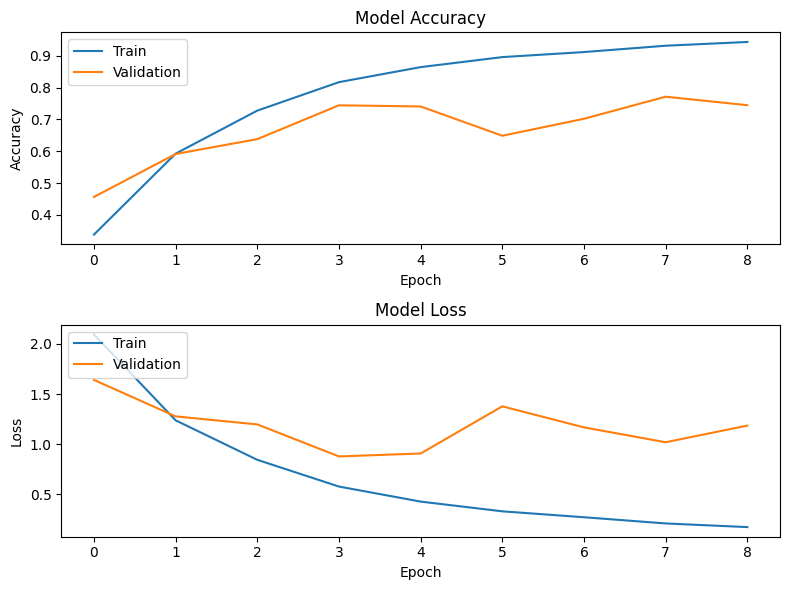

In [340]:
earlyStopping = EarlyStopping(monitor="val_loss", patience=5)
# fix random seed for reproducibility

tf.keras.utils.set_random_seed(42)
X_train_37, y_train_37, X_val_37, y_val_37, num_classes = preprocess_data(X_train_37, y_train_37, X_val_37, y_val_37)



model = create_cnn_model(input_shape_37, num_classes)
# Fit the model
history = model.fit(X_train_37, y_train_37, validation_data=(X_val_37, y_val_37),
                    epochs=100, batch_size=100, verbose=1, callbacks=[earlyStopping])
# Final evaluation of the model
scores = model.evaluate(X_val_37, y_val_37, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

plot_accuracy_loss(history)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 117s 319ms/step - accuracy: 0.3108 - loss: 5.6230 - val_accuracy: 0.5823 - val_loss: 1.3871
Epoch 2/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 116s 320ms/step - accuracy: 0.7896 - loss: 0.7067 - val_accuracy: 0.6753 - val_loss: 1.3714
Epoch 3/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 117s 323ms/step - accuracy: 0.9161 - loss: 0.2739 - val_accuracy: 0.7160 - val_loss: 1.3894
Epoch 4/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 117s 322ms/step - accuracy: 0.9541 - loss: 0.1522 - val_accuracy: 0.7230 - val_loss: 1.5273
Epoch 5/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 117s 323ms/step - accuracy: 0.9704 - loss: 0.0942 - val_accuracy: 0.7280 - val_loss: 1.5572
CNN Error: 27.20%


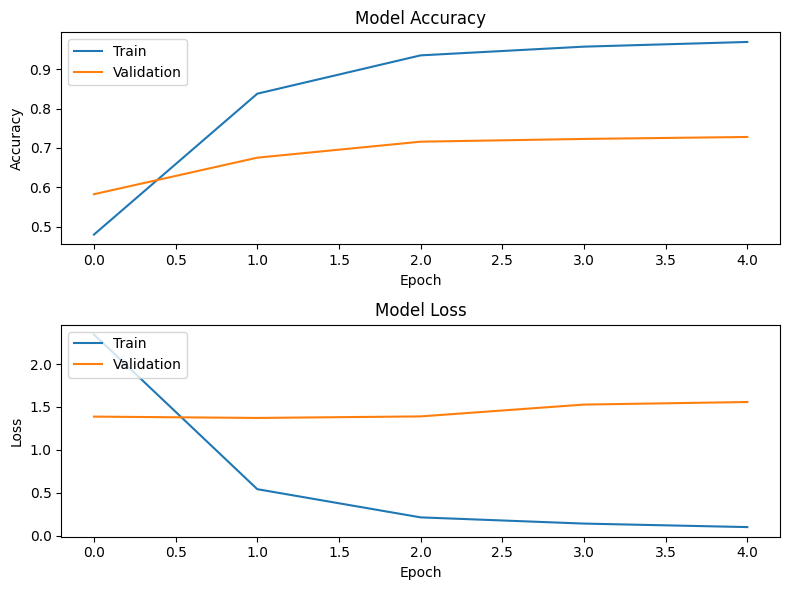

In [341]:


tf.keras.utils.set_random_seed(42)

X_train_131, y_train_131, X_val_131, y_val_131, num_classes_131 = preprocess_data(X_train_131, y_train_131, X_val_131, y_val_131)

model = create_cnn_model(input_shape_131, num_classes)
# Fit the model
history = model.fit(X_train_131, y_train_131, validation_data=(X_val_131, y_val_131),
                    epochs=100, batch_size=100, verbose=1, callbacks=[earlyStopping])
# Final evaluation of the model
scores = model.evaluate(X_val_131, y_val_131, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

plot_accuracy_loss(history)

results:
<br>
pre anomaly removal (37x37)= val_accuracy: 0.6157 - val_loss: 1.4651
<br>
pre anomaly removal (131x131)= val_accuracy: 0.6390 - val_loss: 2.2543
<br>
<br>
post anomaly removal(37x37)= val_accuracy: 0.6760 - val_loss: 1.3388
<br>
post anomaly removal (131x131)=val_accuracy: 0.6677 - val_loss: 1.5861
<br>
<br>
post undersampler (37x37)=val_accuracy: 0.5420 - val_loss: 1.8844
<br>
post undersampler (131x131)= val_accuracy: 0.4780 - val_loss: 2.7832
<br>
<br>
post oversampler (37x37)=val_accuracy: 0.7400 - val_loss: 1.3614
<br>
post oversampler (131x131)=val_accuracy: 0.7013 - val_loss: 1.7370
<br>
<br>
post augment (37x37)= val_accuracy: 0.7447 - val_loss: 1.1858
<br>
post augment(131x131)= val_accuracy: 0.7280 - val_loss: 1.5572

In [50]:
print(X_train_37.shape)
print(y_train_37.shape)
print(X_val_37.shape)
print(y_val_37.shape)

print(X_train_131.shape)
print(y_train_131.shape)
print(X_val_131.shape)
print(y_val_131.shape)

(28650, 37, 37, 1)
(28650, 15)
(6000, 37, 37, 1)
(6000, 15)
(7440, 131, 131, 1)
(7440, 15)
(6000, 131, 131, 1)
(6000, 15)


<h1>Modelling and evaluation</h1>
now we will commence modelling and evaluation, i apply dropout, then normalisation to the model and see how it affects the results

In [12]:
X_train_37 = X_train_backup_37
y_train_37 = y_train_backup_37
X_val_37 = X_val_backup_37
y_val_37 = y_val_backup_37


X_train_131 = X_train_backup_131
y_train_131 = y_train_backup_131
X_val_131 = X_val_backup_131
y_val_131 = y_val_backup_131

In [383]:
# from tensorflow.keras.layers import BatchNormalization

def create_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    model.add(Conv2D(128, (3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [395]:
X_train_37, y_train_37= augment_data(X_train_37, y_train_37)


In [409]:
print(X_train_37.shape)
print(y_train_37.shape)
print(X_val_37.shape)
print(y_val_37.shape)

print(X_train_131.shape)
print(y_train_131.shape)
print(X_val_131.shape)
print(y_val_131.shape)

(9028, 37, 37)
(9028,)
(3000, 37, 37)
(3000,)
(9028, 131, 131)
(9028,)
(3000, 131, 131)
(3000,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.1020 - loss: 3.5729 - val_accuracy: 0.1320 - val_loss: 2.6595
Epoch 2/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.1638 - loss: 2.5508 - val_accuracy: 0.1890 - val_loss: 2.4744
Epoch 3/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.2053 - loss: 2.3844 - val_accuracy: 0.2357 - val_loss: 2.3306
Epoch 4/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.2500 - loss: 2.2329 - val_accuracy: 0.2970 - val_loss: 2.1423
Epoch 5/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.2919 - loss: 2.1027 - val_accuracy: 0.3367 - val_loss: 2.0270
Epoch 6/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3270 - loss: 2.0056 - val_accuracy: 0.3460 - val_loss: 1.9246
Epoch 7/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3617 - loss: 1.9099 - val_accuracy: 0.3430 - val_loss: 1.9017
Epoch 8/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3980 - loss: 1.8097 - 

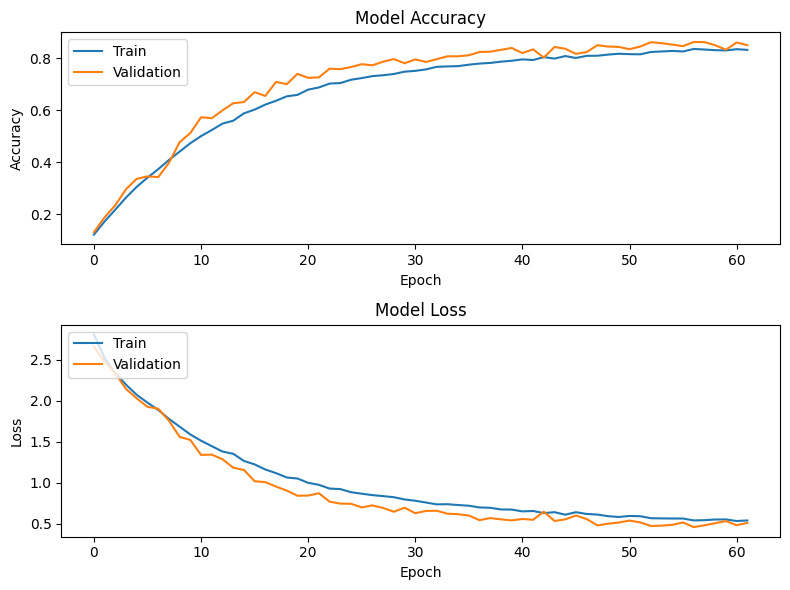

In [397]:
tf.keras.utils.set_random_seed(42)
earlyStopping = EarlyStopping(monitor="val_loss", patience=5)
X_train_37, y_train_37, X_val_37, y_val_37, num_classes_37 = preprocess_data(X_train_37, y_train_37, X_val_37, y_val_37)


model = create_cnn_model(input_shape_37, num_classes)
# Fit the model
history = model.fit(X_train_37, y_train_37, validation_data=(X_val_37, y_val_37),
                    epochs=100, batch_size=100, verbose=1, callbacks=[earlyStopping])
# Final evaluation of the model
scores = model.evaluate(X_val_37, y_val_37, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

plot_accuracy_loss(history)

In [392]:
# Apply data augmentation
X_train_131, y_train_131= augment_data(X_train_131, y_train_131)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 120s 327ms/step - accuracy: 0.1011 - loss: 6.7129 - val_accuracy: 0.1753 - val_loss: 2.4315
Epoch 2/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 118s 327ms/step - accuracy: 0.2942 - loss: 2.1456 - val_accuracy: 0.3980 - val_loss: 1.9411
Epoch 3/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 118s 327ms/step - accuracy: 0.4803 - loss: 1.6122 - val_accuracy: 0.5917 - val_loss: 1.3389
Epoch 4/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 117s 324ms/step - accuracy: 0.6150 - loss: 1.2037 - val_accuracy: 0.6130 - val_loss: 1.2935
Epoch 5/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 119s 330ms/step - accuracy: 0.6987 - loss: 0.9573 - val_accuracy: 0.7737 - val_loss: 0.7922
Epoch 6/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 122s 337ms/step - accuracy: 0.7606 - loss: 0.7645 - val_accuracy: 0.8057 - val_loss: 0.6812
Epoch 7/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 121s 335ms/step - accuracy: 0.7940 - loss: 0.6553 - val_accuracy: 0.8240 - val_loss: 0.5896
Epoch 8/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 119s 327ms/step - accuracy: 

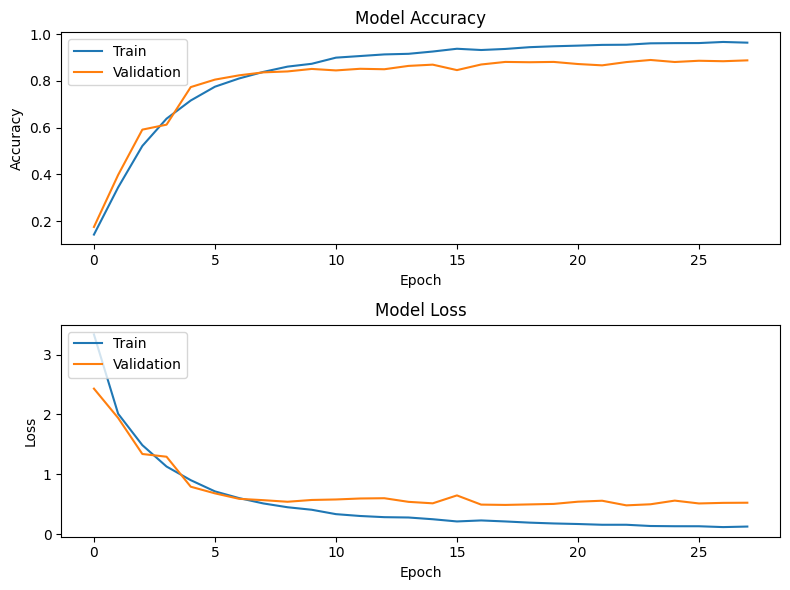

In [393]:
tf.keras.utils.set_random_seed(42)
earlyStopping = EarlyStopping(monitor="val_loss", patience=5)
X_train_131, y_train_131, X_val_131, y_val_131, num_classes_131 = preprocess_data(X_train_131, y_train_131, X_val_131, y_val_131)

model = create_cnn_model(input_shape_131, num_classes)
# Fit the model
history = model.fit(X_train_131, y_train_131, validation_data=(X_val_131, y_val_131),
                    epochs=100, batch_size=100, verbose=1, callbacks=[earlyStopping])
# Final evaluation of the model
scores = model.evaluate(X_val_131, y_val_131, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

plot_accuracy_loss(history)

best: post augment+oversample(37x37)=val_loss: 1.2488 - val_accuracy: 0.7493
<br>
best: post augment(131x131)=val_loss: 1.6853 - val_accuracy: 0.7410

In [398]:
X_train_37 = X_train_backup_37
y_train_37 = y_train_backup_37
X_val_37 = X_val_backup_37
y_val_37 = y_val_backup_37


X_train_131 = X_train_backup_131
y_train_131 = y_train_backup_131
X_val_131 = X_val_backup_131
y_val_131 = y_val_backup_131

In [399]:
X_train_37, y_train_37 = augment_data(X_train_37, y_train_37)
X_train_131, y_train_131= augment_data(X_train_131, y_train_131)

In [400]:

def create_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    model.add(Conv2D(128, (3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.1066 - loss: 2.6850 - val_accuracy: 0.1160 - val_loss: 3.1680
Epoch 2/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.2346 - loss: 2.2044 - val_accuracy: 0.1860 - val_loss: 2.8562
Epoch 3/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.3540 - loss: 1.8976 - val_accuracy: 0.2960 - val_loss: 2.2476
Epoch 4/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.4230 - loss: 1.7104 - val_accuracy: 0.4410 - val_loss: 1.5969
Epoch 5/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.4737 - loss: 1.5452 - val_accuracy: 0.3347 - val_loss: 2.2040
Epoch 6/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.5253 - loss: 1.4173 - val_accuracy: 0.4737 - val_loss: 1.5189
Epoch 7/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.5554 - loss: 1.3194 - val_accuracy: 0.5793 - val_loss: 1.1629
Epoch 8/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.5852 - loss: 1.2346 -

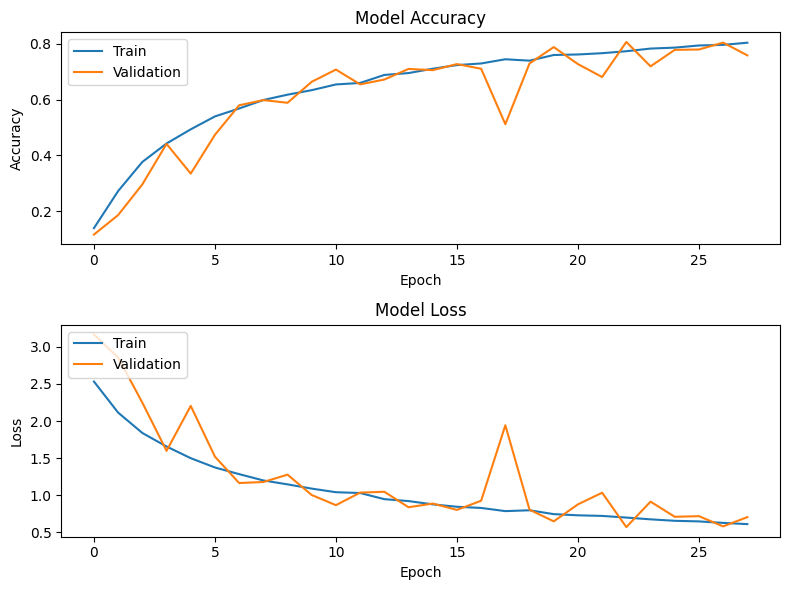

In [401]:
tf.keras.utils.set_random_seed(42)
earlyStopping = EarlyStopping(monitor="val_loss", patience=5)
X_train_37, y_train_37, X_val_37, y_val_37, num_classes_37 = preprocess_data(X_train_37, y_train_37, X_val_37, y_val_37)


model = create_cnn_model(input_shape_37, num_classes)
# Fit the model
history = model.fit(X_train_37, y_train_37, validation_data=(X_val_37, y_val_37),
                    epochs=100, batch_size=100, verbose=1, callbacks=[earlyStopping])
# Final evaluation of the model
scores = model.evaluate(X_val_37, y_val_37, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

plot_accuracy_loss(history)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 127s 345ms/step - accuracy: 0.2400 - loss: 2.3952 - val_accuracy: 0.1110 - val_loss: 8.9744
Epoch 2/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 126s 348ms/step - accuracy: 0.5455 - loss: 1.3862 - val_accuracy: 0.2963 - val_loss: 3.8498
Epoch 3/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 123s 339ms/step - accuracy: 0.6842 - loss: 0.9534 - val_accuracy: 0.3470 - val_loss: 3.5384
Epoch 4/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 125s 344ms/step - accuracy: 0.7547 - loss: 0.7292 - val_accuracy: 0.6243 - val_loss: 1.4880
Epoch 5/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 123s 340ms/step - accuracy: 0.8081 - loss: 0.5740 - val_accuracy: 0.5727 - val_loss: 1.9127
Epoch 6/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 125s 344ms/step - accuracy: 0.8496 - loss: 0.4521 - val_accuracy: 0.4913 - val_loss: 2.5562
Epoch 7/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 124s 343ms/step - accuracy: 0.8757 - loss: 0.3716 - val_accuracy: 0.8010 - val_loss: 0.6675
Epoch 8/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 124s 342ms/step - accuracy: 

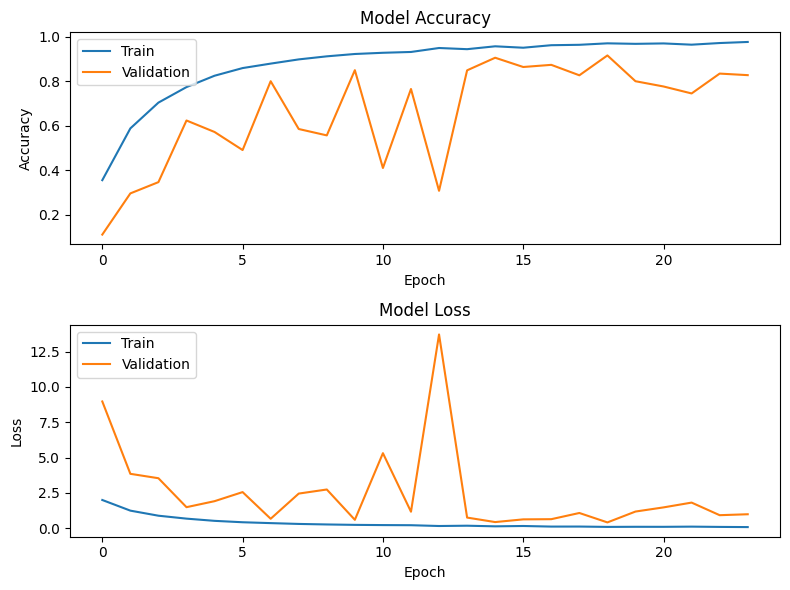

In [402]:
tf.keras.utils.set_random_seed(42)
earlyStopping = EarlyStopping(monitor="val_loss", patience=5)

X_train_131, y_train_131, X_val_131, y_val_131, num_classes_131 = preprocess_data(X_train_131, y_train_131, X_val_131, y_val_131)

model = create_cnn_model(input_shape_131, num_classes)
# Fit the model
history = model.fit(X_train_131, y_train_131, validation_data=(X_val_131, y_val_131),
                    epochs=100, batch_size=100, verbose=1, callbacks=[earlyStopping])
# Final evaluation of the model
scores = model.evaluate(X_val_131, y_val_131, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

plot_accuracy_loss(history)

as normalissation + dropout had worse rezults than just dropout, i will stick to just dropout

In [445]:
X_train_37 = X_train_backup_37
y_train_37 = y_train_backup_37
X_val_37 = X_val_backup_37
y_val_37 = y_val_backup_37


X_train_131 = X_train_backup_131
y_train_131 = y_train_backup_131
X_val_131 = X_val_backup_131
y_val_131 = y_val_backup_131

In [418]:
X_train_37, y_train_37 = augment_data(X_train_37, y_train_37)
X_train_131, y_train_131= augment_data(X_train_131, y_train_131)

In [419]:
def create_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    model.add(Conv2D(128, (3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.0965 - loss: 3.0965 - val_accuracy: 0.1550 - val_loss: 2.5180
Epoch 2/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.1784 - loss: 2.3662 - val_accuracy: 0.3033 - val_loss: 2.0825
Epoch 3/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3021 - loss: 2.0654 - val_accuracy: 0.3083 - val_loss: 2.1224
Epoch 4/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.3614 - loss: 1.8921 - val_accuracy: 0.4103 - val_loss: 1.7572
Epoch 5/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.4175 - loss: 1.7384 - val_accuracy: 0.4633 - val_loss: 1.5934
Epoch 6/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.4540 - loss: 1.6256 - val_accuracy: 0.5177 - val_loss: 1.4970
Epoch 7/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.4957 - loss: 1.5286 - val_accuracy: 0.5650 - val_loss: 1.3759
Epoch 8/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5319 - loss: 1.4005 -

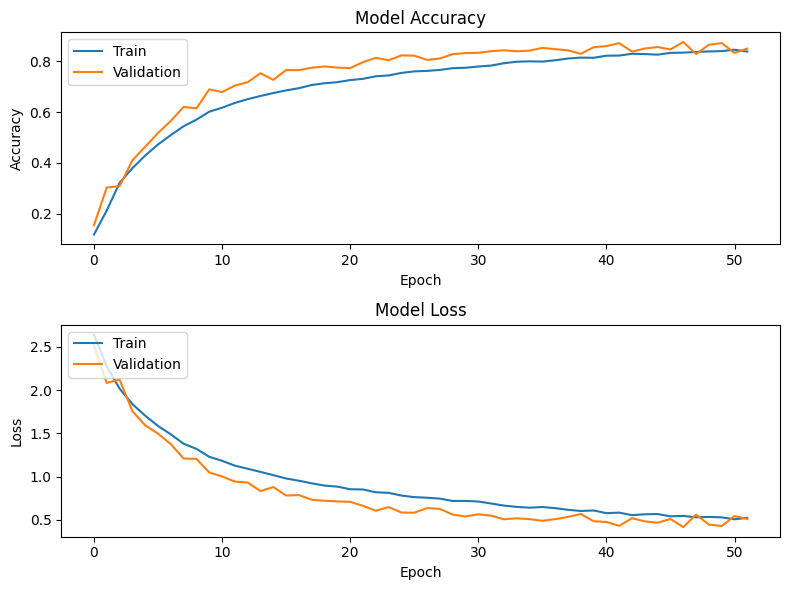

In [420]:
tf.keras.utils.set_random_seed(42)
earlyStopping = EarlyStopping(monitor="val_loss", patience=5)
X_train_37, y_train_37, X_val_37, y_val_37, num_classes_37 = preprocess_data(X_train_37, y_train_37, X_val_37, y_val_37)


model = create_cnn_model(input_shape_37, num_classes)
# Fit the model
history = model.fit(X_train_37, y_train_37, validation_data=(X_val_37, y_val_37),
                    epochs=100, batch_size=100, verbose=1, callbacks=[earlyStopping])
# Final evaluation of the model
scores = model.evaluate(X_val_37, y_val_37, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

plot_accuracy_loss(history)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 120s 325ms/step - accuracy: 0.1316 - loss: 4.6971 - val_accuracy: 0.3560 - val_loss: 2.1286
Epoch 2/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 118s 326ms/step - accuracy: 0.4137 - loss: 1.8333 - val_accuracy: 0.5727 - val_loss: 1.3704
Epoch 3/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 119s 329ms/step - accuracy: 0.5825 - loss: 1.3255 - val_accuracy: 0.6470 - val_loss: 1.1169
Epoch 4/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 117s 324ms/step - accuracy: 0.6894 - loss: 0.9947 - val_accuracy: 0.7490 - val_loss: 0.8476
Epoch 5/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 120s 331ms/step - accuracy: 0.7635 - loss: 0.7780 - val_accuracy: 0.7817 - val_loss: 0.6971
Epoch 6/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 120s 331ms/step - accuracy: 0.8187 - loss: 0.5938 - val_accuracy: 0.8283 - val_loss: 0.5858
Epoch 7/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 119s 329ms/step - accuracy: 0.8509 - loss: 0.4945 - val_accuracy: 0.8267 - val_loss: 0.6028
Epoch 8/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 121s 334ms/step - accuracy: 

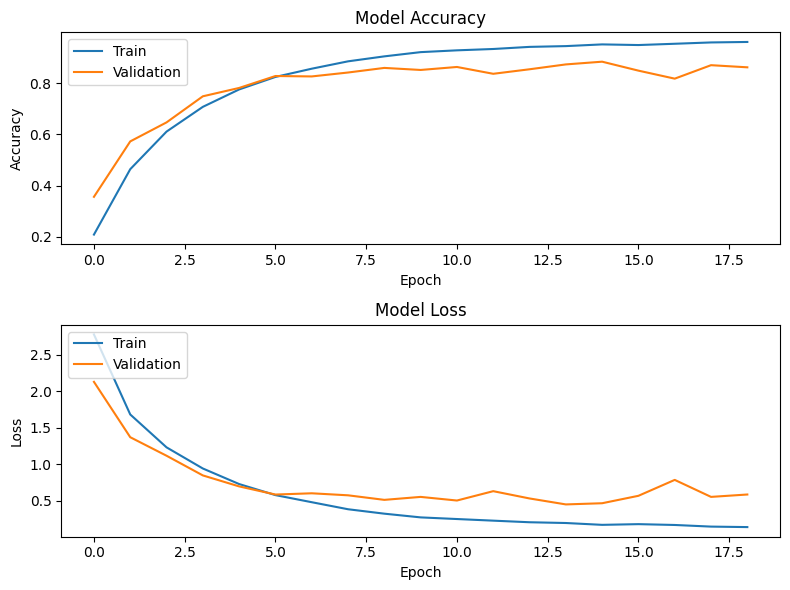

In [421]:
tf.keras.utils.set_random_seed(42)
earlyStopping = EarlyStopping(monitor="val_loss", patience=5)

X_train_131, y_train_131, X_val_131, y_val_131, num_classes_131 = preprocess_data(X_train_131, y_train_131, X_val_131, y_val_131)

model = create_cnn_model(input_shape_131, num_classes)
# Fit the model
history = model.fit(X_train_131, y_train_131, validation_data=(X_val_131, y_val_131),
                    epochs=100, batch_size=100, verbose=1, callbacks=[earlyStopping])
# Final evaluation of the model
scores = model.evaluate(X_val_131, y_val_131, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

plot_accuracy_loss(history)

accuraccy and loss became worse after adding layers, so i will not add dense layers


<h1>Finally i will do hyperparameter tuning to try and achieve the best classification accuracy and the lowest loss</h1>

In [36]:
X_train_37 = X_train_backup_37
y_train_37 = y_train_backup_37
X_val_37 = X_val_backup_37
y_val_37 = y_val_backup_37


X_train_131 = X_train_backup_131
y_train_131 = y_train_backup_131
X_val_131 = X_val_backup_131
y_val_131 = y_val_backup_131




In [37]:
X_train_37, y_train_37 = augment_data(X_train_37, y_train_37)
X_train_37, y_train_37, X_val_37, y_val_37, num_classes_37 = preprocess_data(X_train_37, y_train_37, X_val_37, y_val_37)





In [38]:

def create_cnn_model(num_classes, learning_rate=0.001, dropout_rate=0.4, neurons_dense1=128, neurons_dense2=64):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(37,37,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))
    model.add(Flatten())
    model.add(Dense(neurons_dense1, activation='relu'))
    model.add(Dense(neurons_dense2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=learning_rate),
                  metrics=['accuracy'])

    return model


In [39]:



param_grid = {
    'learning_rate': [0.001, 0.0005, 0.0001],
    'dropout_rate': [0.3, 0.4, 0.5],
    'neurons_dense1': [64, 128, 256],
    'neurons_dense2': [32, 64, 128]
}

random_search = RandomizedSearchCV(
    estimator=KerasClassifier(model=create_cnn_model, epochs=10, batch_size=32, verbose=0, dropout_rate=0.3, learning_rate=0.0005,
                              neurons_dense1=256, neurons_dense2=64,num_classes=15),
    param_distributions=param_grid,
    n_iter=5,
    cv=3,
    verbose=2
)


random_search.fit(X_train_37, y_train_37, validation_data=(X_val_37, y_val_37))



Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END dropout_rate=0.5, learning_rate=0.0005, neurons_dense1=64, neurons_dense2=128; total time= 1.5min
[CV] END dropout_rate=0.5, learning_rate=0.0005, neurons_dense1=64, neurons_dense2=128; total time= 1.5min
[CV] END dropout_rate=0.5, learning_rate=0.0005, neurons_dense1=64, neurons_dense2=128; total time= 1.5min
[CV] END dropout_rate=0.5, learning_rate=0.0005, neurons_dense1=128, neurons_dense2=128; total time= 1.5min
[CV] END dropout_rate=0.5, learning_rate=0.0005, neurons_dense1=128, neurons_dense2=128; total time= 1.5min
[CV] END dropout_rate=0.5, learning_rate=0.0005, neurons_dense1=128, neurons_dense2=128; total time= 1.5min
[CV] END dropout_rate=0.3, learning_rate=0.0001, neurons_dense1=256, neurons_dense2=128; total time= 1.6min
[CV] END dropout_rate=0.3, learning_rate=0.0001, neurons_dense1=256, neurons_dense2=128; total time= 1.6min
[CV] END dropout_rate=0.3, learning_rate=0.0001, neurons_dense1=256, neurons_de

RandomizedSearchCV(cv=3,
                   estimator=KerasClassifier(batch_size=32, dropout_rate=0.3, epochs=10, learning_rate=0.0005, model=<function create_cnn_model at 0x7fcecc51be20>, neurons_dense1=256, neurons_dense2=64, num_classes=15, verbose=0),
                   n_iter=5,
                   param_distributions={'dropout_rate': [0.3, 0.4, 0.5],
                                        'learning_rate': [0.001, 0.0005,
                                                          0.0001],
                                        'neurons_dense1': [64, 128, 256],
                                        'neurons_dense2': [32, 64, 128]},
                   verbose=2)

In [40]:
X_train_37 = X_train_backup_37
y_train_37 = y_train_backup_37
X_val_37 = X_val_backup_37
y_val_37 = y_val_backup_37
X_test_37 = X_test_backup_37
y_test_37 = y_test_backup_37



In [41]:
X_train_37, y_train_37, X_test_37, y_test_37, num_classes = preprocess_data_final(X_train_37, y_train_37, X_val_37, y_val_37,X_test_37,y_test_37)


In [42]:
X_train_37, y_train_37 = augment_data(X_train_37, y_train_37)


In [43]:
best_params = random_search.best_params_

# Create a new model with the best hyperparameters
best_model_37 = create_cnn_model(
                              num_classes=num_classes,
                              learning_rate=best_params['learning_rate'],
                              dropout_rate=best_params['dropout_rate'],
                              neurons_dense1=best_params['neurons_dense1'],
                              neurons_dense2=best_params['neurons_dense2'])







earlyStopping = EarlyStopping(monitor="val_loss", patience=5)

# Train the best model on the entire training data
best_model_37.fit(X_train_37, y_train_37, epochs=200, batch_size=100, validation_data=(X_test_37, y_test_37),callbacks=[earlyStopping])


# Save the best model to an HDF5 file
best_model_37.save('best_cnn_37_model.h5')

Epoch 1/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.0828 - loss: 5.4774 - val_accuracy: 0.1137 - val_loss: 2.6240
Epoch 2/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.1243 - loss: 2.5939 - val_accuracy: 0.1830 - val_loss: 2.4163
Epoch 3/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.1800 - loss: 2.3972 - val_accuracy: 0.2817 - val_loss: 2.1838
Epoch 4/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.2503 - loss: 2.2224 - val_accuracy: 0.3500 - val_loss: 2.0051
Epoch 5/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.3051 - loss: 2.0534 - val_accuracy: 0.4180 - val_loss: 1.8144
Epoch 6/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.3615 - loss: 1.8919 - val_accuracy: 0.4737 - val_loss: 1.6425
Epoch 7/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.4082 - loss: 1.7597 - val_accuracy: 0.5157 - val_loss: 1.5243
Epoch 8/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.4447 - loss: 1

In [46]:
# Evaluate the model on the test set
test_loss, test_accuracy = best_model_37.evaluate(X_test_37, y_test_37)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9288 - loss: 0.2237


In [606]:
best_model_37.summary()


Model: "sequential_347"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_972 (Conv2D)                  │ (None, 35, 35, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_942 (MaxPooling2D)     │ (None, 17, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_973 (Conv2D)                  │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_943 (MaxPooling2D)     │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_786 (Dropout)                │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_974 (Conv2D)                  │ (None, 5, 5, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_944 (MaxPooling2D)     │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_787 (Dropout)                │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_317 (Flatten)                │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_945 (Dense)                    │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_946 (Dense)                    │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_788 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_947 (Dense)                    │ (None, 15)                  │             975 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 724,271 (2.76 MB)

 Trainable params: 241,423 (943.06 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 482,848 (1.84 MB)

In [20]:
X_train_131 = X_train_backup_131
y_train_131 = y_train_backup_131
X_val_131 = X_val_backup_131
y_val_131 = y_val_backup_131
X_test_131 = X_test_backup_131
y_test_131 = y_test_backup_131





In [21]:
X_train_131, y_train_131 = augment_data(X_train_131, y_train_131)
X_train_131, y_train_131, X_val_131, y_val_131, num_classes = preprocess_data(X_train_131, y_train_131, X_val_131, y_val_131)

In [24]:
print(X_train_131.shape)
print(y_train_131.shape)
print(X_val_131.shape)
print(y_val_131.shape)
print(X_test_131.shape)
print(y_test_131.shape)

(144448, 131, 131)
(144448, 15)
(3000, 131, 131)
(3000, 15)
(3000, 131, 131)
(3000,)


In [31]:
def create_cnn_model(num_classes, learning_rate=0.001, dropout_rate=0.4, neurons_dense1=128, neurons_dense2=64):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(131,131,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))
    model.add(Flatten())
    model.add(Dense(neurons_dense1, activation='relu'))
    model.add(Dense(neurons_dense2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=learning_rate),
                  metrics=['accuracy'])

    return model




In [17]:

param_grid = {
    'learning_rate': [0.001, 0.0005, 0.0001],
    'dropout_rate': [0.3, 0.4, 0.5],
    'neurons_dense1': [64, 128, 256],
    'neurons_dense2': [32, 64, 128]
}

random_search = RandomizedSearchCV(
    estimator=KerasClassifier(model=create_cnn_model, epochs=10, batch_size=32, verbose=0, dropout_rate=0.3, learning_rate=0.0005,
                              neurons_dense1=256, neurons_dense2=64,num_classes=15),
    param_distributions=param_grid,
    n_iter=5,
    cv=3,
    verbose=2
)


random_search.fit(X_train_131, y_train_131, validation_data=(X_val_131, y_val_131))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END dropout_rate=0.4, learning_rate=0.001, neurons_dense1=256, neurons_dense2=32; total time=14.4min
[CV] END dropout_rate=0.4, learning_rate=0.001, neurons_dense1=256, neurons_dense2=32; total time=14.5min
[CV] END dropout_rate=0.4, learning_rate=0.001, neurons_dense1=256, neurons_dense2=32; total time=14.3min
[CV] END dropout_rate=0.3, learning_rate=0.0001, neurons_dense1=128, neurons_dense2=64; total time=13.4min
[CV] END dropout_rate=0.3, learning_rate=0.0001, neurons_dense1=128, neurons_dense2=64; total time=13.4min
[CV] END dropout_rate=0.3, learning_rate=0.0001, neurons_dense1=128, neurons_dense2=64; total time=13.5min
[CV] END dropout_rate=0.4, learning_rate=0.001, neurons_dense1=128, neurons_dense2=128; total time=13.5min
[CV] END dropout_rate=0.4, learning_rate=0.001, neurons_dense1=128, neurons_dense2=128; total time=13.5min
[CV] END dropout_rate=0.4, learning_rate=0.001, neurons_dense1=128, neurons_dense2=128;

RandomizedSearchCV(cv=3,
                   estimator=KerasClassifier(batch_size=32, dropout_rate=0.3, epochs=10, learning_rate=0.0005, model=<function create_cnn_model at 0x7fd1ba063eb0>, neurons_dense1=256, neurons_dense2=64, num_classes=15, verbose=0),
                   n_iter=5,
                   param_distributions={'dropout_rate': [0.3, 0.4, 0.5],
                                        'learning_rate': [0.001, 0.0005,
                                                          0.0001],
                                        'neurons_dense1': [64, 128, 256],
                                        'neurons_dense2': [32, 64, 128]},
                   verbose=2)

In [29]:
X_train_131 = X_train_backup_131
y_train_131 = y_train_backup_131
X_val_131 = X_val_backup_131
y_val_131 = y_val_backup_131
X_test_131 = X_test_backup_131
y_test_131 = y_test_backup_131

X_train_131, y_train_131, X_test_131, y_test_131, num_classes = preprocess_data_final(X_train_131, y_train_131, X_val_131, y_val_131,X_test_131,y_test_131)

X_train_131, y_train_131 = augment_data(X_train_131, y_train_131)


In [33]:
best_params = random_search.best_params_

# Create a new model with the best hyperparameters
best_model_131 = create_cnn_model(
                              num_classes=num_classes,
                              learning_rate=best_params['learning_rate'],
                              dropout_rate=best_params['dropout_rate'],
                              neurons_dense1=best_params['neurons_dense1'],
                              neurons_dense2=best_params['neurons_dense2'])


earlyStopping = EarlyStopping(monitor="val_loss", patience=5)
# Train the best model on the entire training data
best_model_131.fit(X_train_131, y_train_131, epochs=200, batch_size=100, validation_data=(X_test_131, y_test_131),callbacks=[earlyStopping])
# Save the best model to an HDF5 file
best_model_131.save('best_cnn_131_model.h5')


Epoch 1/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 157s 323ms/step - accuracy: 0.0879 - loss: 7.7695 - val_accuracy: 0.2210 - val_loss: 2.3879
Epoch 2/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 155s 321ms/step - accuracy: 0.2847 - loss: 2.2206 - val_accuracy: 0.5387 - val_loss: 1.4989
Epoch 3/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 154s 320ms/step - accuracy: 0.5241 - loss: 1.5118 - val_accuracy: 0.6733 - val_loss: 1.0381
Epoch 4/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 154s 320ms/step - accuracy: 0.6773 - loss: 1.0386 - val_accuracy: 0.6717 - val_loss: 1.0557
Epoch 5/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 153s 318ms/step - accuracy: 0.7656 - loss: 0.7549 - val_accuracy: 0.7957 - val_loss: 0.6546
Epoch 6/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 154s 319ms/step - accuracy: 0.8386 - loss: 0.5122 - val_accuracy: 0.7840 - val_loss: 0.7537
Epoch 7/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 152s 316ms/step - accuracy: 0.8721 - loss: 0.4077 - val_accuracy: 0.8563 - val_loss: 0.4688
Epoch 8/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 151s 314ms/step - accuracy: 

In [47]:
# Evaluate the model on the test set
test_loss, test_accuracy = best_model_131.evaluate(X_test_131, y_test_131)

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8916 - loss: 0.4177


In [35]:
best_model_131.summary()


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_63 (Conv2D)                   │ (None, 129, 129, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_63 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_64 (Conv2D)                   │ (None, 62, 62, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_64 (MaxPooling2D)      │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_63 (Dropout)                 │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_65 (Conv2D)                   │ (None, 29, 29, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_65 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_64 (Dropout)                 │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_21 (Flatten)                 │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_65 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,967,535 (38.02 MB)

 Trainable params: 3,322,511 (12.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,645,024 (25.35 MB)

<h1>Finally, we have come to the end.</h1>
the best accuraccy and loss for the 37x37 dataset is accuracy: 0.9288 - loss: 0.2237
<br>
while the best accuracy and loss for the 131x131 dataset is  accuracy: 0.8916 - loss: 0.4177